In [186]:
################################################Pandas Function:
import pandas as pd
import numpy as np


url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv'

#1.read csv: load delimited data from a file, use comma as default delimiter
# All parameter available in read_csv: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

# datetime parse

tips = pd.read_csv(url)

# no header
tips = pd.read_csv(url,header=None)

# give you own columns name
tips = pd.read_csv(url,names=['a', 'b', 'c', 'd', 'e','f','g'])

# assign a column to be the index
tips = pd.read_csv(url,names=['a', 'b', 'c', 'd', 'e','f','g'],index_col='g')
# parsed = pd.read_csv('examples/csv_mindex.csv',index_col=['key1', 'key2'])

# sep: multiple white space as delimiter, use regular expression \s+
# tips = pd.read_csv(url,sep='\s+')

# skiprows: skip rows
tips = pd.read_csv(url,skiprows=[0],header=None)
tips.head()

# missing values: na_values can contain a list of values you want to set as missing
# tips = pd.read_csv(url)
# tips = pd.read_csv(url,na_values=['NULL'])
tips = pd.read_csv(url,na_values={'sex':['Female'],'tip':[1.01]})
tips.head()

# parse_dates
# data = pd.read_csv("P:/Exam/test_dates.csv",parse_dates=['joindate'])
# data.head()
# data.dtypes

# 2. dtypes: get each column's data type
tips = pd.read_csv(url)
tips.dtypes

# 3. select columns
tips[['sex','size']].head()

# 4. filter
# and &, or |
tips[tips['size']==2].head()
tips[(tips['size']==2)&(tips['sex']=='Female')].head()

# 5. isnull()
frame = pd.DataFrame({'col1': ['A', 'B', np.NaN, 'C', 'D'],
                      'col2': ['F', np.NaN, 'G', 'H', 'I']})
print(frame)
frame[frame['col2'].isnull()]
# axis=1 is by row: pick up all rows with at least one missing values
frame[frame.isnull().any(axis=1)]

# 6. groupby and agg:np.mean, np.size, np.min, np.max,np.sum
t = tips.groupby(['day']).agg({'total_bill':[np.mean, np.size, np.min, np.max]})
print(t.columns)
print(t)


# 7. type: test object type, whether it is data frame, series, list or anything else
type(t)

# 8. change columns 
# method 1 to change all
t.columns = ['mean', 'size', 'amin', 'amax']

# method2 to rename:df.rename(columns={'oldname':'newname','oldname2':'newname2'}), inplace=True change in the database, no need to create a new data frame
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df
df.rename(columns={'A':'a','B':'b'},inplace=True)
df

# 9. value_counts
tips['day'].value_counts()

# 10. pd.merge
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html
# left_on, right_on = 'variable_name'
# left_index, right_index = true to use index to join tables 
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],'value': np.random.randn(4)})
df2 = pd.DataFrame({'key': ['B', 'D', 'D', 'E'],'value': np.random.randn(4)})
df1.head()
pd.merge(df1,df2,left_on='key',right_on='key',how='inner')

# set_index: use column as index
df1 = df1.set_index('key')
df1
df2 = df2.set_index('key')
df2
pd.merge(df1,df2,left_index=True,right_index=True,how='outer')


  col1 col2
0    A    F
1    B  NaN
2  NaN    G
3    C    H
4    D    I
MultiIndex(levels=[['total_bill'], ['mean', 'size', 'amin', 'amax', 'sum']],
           labels=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]])
     total_bill                            
           mean  size  amin   amax      sum
day                                        
Fri   17.151579  19.0  5.75  40.17   325.88
Sat   20.441379  87.0  3.07  50.81  1778.40
Sun   21.410000  76.0  7.25  48.17  1627.16
Thur  17.682742  62.0  7.51  43.11  1096.33


ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

In [3]:
import pandas as pd
import numpy as np
# 11. range(start,end,step): create a list of integers
list(range(0,10,2))

# 12. pd.concat: concatenate data frame on the axis
# normally axis=0 by row, axis=1 by column
# axis=0 is by row(default)
# axis=1 is by column(default is to use index to outer join, change ignore_index=True if don't want to use index to join)
df1 = pd.DataFrame({'city': ['Chicago', 'San Francisco', 'New York City'],'rank': range(1, 4),'Ind':np.random.randn(3)})
df2 = pd.DataFrame({'city': ['Chicago', 'Boston', 'Los Angeles'],'rank': [1, 4, 5],'Ind':np.random.randn(3)})
df1 = df1.set_index('rank')
df2 = df2.set_index('rank')
print(df1)
print(df2)

print(pd.concat([df1,df2],axis=0)) # row combine
print(pd.concat([df1,df2],axis=1)) # column cobine, default use index, outer join

# 13. reset_index is to change the original index as a column for the data frame
df1.reset_index(inplace=True)
df1.reset_index(inplace=True)
pd.concat([df1,df2],axis=1)

# 14. df.index to get dataframe's index and could also assign list to change orginal index
list(df1.index)
df1.index = [2,6,3]
print(df1)

# 15. sort_index is to sort data frame's index
df1.sort_index(inplace=True,ascending=False)
print(df1)

# 16. sort_value is to sort column's value

tips = pd.read_csv('C:/Users/gqbwang/Documents/tips.csv')
tips.sort_values(by=['total_bill','tip'],inplace=True,ascending=False)
print(tips.head())

# 17. nlargest to pick up the first n largest based on columns
tips.nlargest(15,columns=['total_bill'])

# 18. cumcount() to give cumulative count after group by
tips = pd.read_csv('C:/Users/gqbwang/Documents/tips.csv')
tips.head()

tips = tips.assign(rn = tips.sort_values(by=['total_bill'],ascending=False).
                   groupby(['day']).cumcount()+1).sort_values(['day','rn'],ascending=[True,True])


# 19. query is to filter 
tips.query('rn<=2')

# 20. rank: computer numeric data ranks (1 through n) along axis(default 0 is index, 1 is column)
# https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.rank.html
tips = pd.read_csv('C:/Users/gqbwang/Documents/tips.csv')
tips = tips.assign(rank=tips.groupby(['day'])['total_bill'].rank(method='first')).sort_values(by=['day','rank'])
tips







           Ind           city
rank                         
1    -0.950237        Chicago
2     0.467307  San Francisco
3    -0.265070  New York City
           Ind         city
rank                       
1     0.601118      Chicago
4     0.942052       Boston
5     0.228591  Los Angeles
           Ind           city
rank                         
1    -0.950237        Chicago
2     0.467307  San Francisco
3    -0.265070  New York City
1     0.601118        Chicago
4     0.942052         Boston
5     0.228591    Los Angeles
           Ind           city       Ind         city
rank                                                
1    -0.950237        Chicago  0.601118      Chicago
2     0.467307  San Francisco       NaN          NaN
3    -0.265070  New York City       NaN          NaN
4          NaN            NaN  0.942052       Boston
5          NaN            NaN  0.228591  Los Angeles
   index  rank       Ind           city
2      0     1 -0.950237        Chicago
6      1     2  0.4

,total_bill,tip,sex,smoker,day,time,size,rank
92,5.75,1.00,Female,Yes,Fri,Dinner,2,1.0
222,8.58,1.92,Male,Yes,Fri,Lunch,1,2.0
226,10.09,2.00,Female,Yes,Fri,Lunch,2,3.0
100,11.35,2.50,Female,Yes,Fri,Dinner,2,4.0
97,12.03,1.50,Male,Yes,Fri,Dinner,2,5.0
220,12.16,2.20,Male,Yes,Fri,Lunch,2,6.0
99,12.46,1.50,Male,No,Fri,Dinner,2,7.0
221,13.42,3.48,Female,Yes,Fri,Lunch,2,8.0
224,13.42,1.58,Male,Yes,Fri,Lunch,2,9.0
101,15.38,3.00,Female,Yes,Fri,Dinner,2,10.0


In [172]:
# 21.loc(filter,variables name):use to select certain rows and columns
tips = pd.read_csv('C:/Users/gqbwang/Documents/tips.csv')
# select records with missing total_bill
tips.loc[tips['total_bill'].isnull(),].head()
tips.loc[tips['total_bill']<7,'total_bill']
tips.loc[tips['total_bill']<7,'total_bill'] = tips.loc[tips['total_bill']<7,'total_bill']*2


# 22.np.arange(start,stop, step): return a evenly values within certain interval
# if start,stop is integer, it is the same as range
print(np.arange(1,5))
print(np.arange(1.1,1.5,0.1))

# 23.format as float
print([float(x) for x in np.arange(1,10)])
y = [13.456,12,567,1234.5678]
print(['{:.2f}'.format(x) for x in y])
print(['${:,.2f}'.format(x) for x in y])

# 24.pd.date_range('month/day/year',periods=num, freq='5D') default is D means days, M means month, Y means year
rng= pd.date_range('2/2/2013',periods=5,freq='D')
print(rng)
print(rng.year)
print(rng.month)
print(rng.day)

# 25. pd.timestamp is used to represent a date
dn = pd.Timestamp('2015-10-24')
print(dn)
print(dn.year)


# 26.df.info(): to get basic information of the dataframe, such as index range, data type of each column, how big size is the dataframe
tips = pd.read_csv('C:/Users/gqbwang/Documents/tips.csv')
print(tips.info())
tips.shape

# 27. df.dtypes to get each column's datatype, whether it int, float or object
print(tips.dtypes)

# 28. df.select_dtypes(include/exclude='object')
tipsobject = tips.select_dtypes(include='object')
print(tipsobject.head())

# 29. pd.to_datetime(column,format='%Y-%m-%d'): the format here is column's format
# http://strftime.org/
student = pd.DataFrame({'Date':['2018-02-02','2018-02-03','2018-02-04','2018-02-02','2018-02-03','2018-02-04',
                               '2018-02-02','2018-02-03','2018-02-04','2018-02-02','2018-02-03','2018-02-04'],
                        'ID':[1,1,1,2,2,2,5,5,5,6,6,6],
                        'Attendance':[1,5,0,1,1,1,1,0,0,1,1,1]})
student['Date_N'] = pd.to_datetime(student['Date'],format='%Y-%m-%d')
student.head()
print(student.dtypes)  #date here is object, change to date type by using to_datetime

# 30. change data type to object
# change total_bill to object
tips = pd.read_csv('C:/Users/gqbwang/Documents/tips.csv')
tips['total_bill'] = tips['total_bill'].astype(str)
print(tips.dtypes)
# change total_bill back to int. But must change to float first, then change to int
tips['total_bill'] = tips['total_bill'].astype(float).astype(int)
print(tips.dtypes)
print(tips.head())



[1 2 3 4]
[1.1 1.2 1.3 1.4]
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
['13.46', '12.00', '567.00', '1234.57']
['$13.46', '$12.00', '$567.00', '$1,234.57']
DatetimeIndex(['2013-02-02', '2013-02-03', '2013-02-04', '2013-02-05',
               '2013-02-06'],
              dtype='datetime64[ns]', freq='D')
Int64Index([2013, 2013, 2013, 2013, 2013], dtype='int64')
Int64Index([2, 2, 2, 2, 2], dtype='int64')
Int64Index([2, 3, 4, 5, 6], dtype='int64')
2015-10-24 00:00:00
2015
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB
None
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
ti

In [221]:
# 31.strftime: is to display the datetime as certain format, or we can say extract month, year
# reference: http://strftime.org/
student = pd.DataFrame({'Date':['2018-02-02','2018-02-03','2018-02-04','2018-02-02','2018-02-03','2018-02-04',
                               '2018-02-02','2018-02-03','2018-02-04','2018-02-02','2018-02-03','2018-02-04'],
                        'ID':[1,1,1,2,2,2,5,5,5,6,6,6],
                        'Attendance':[1,5,0,1,1,1,1,0,0,1,1,1]})
student['Date_N'] = pd.to_datetime(student['Date'],format='%Y-%m-%d')
student.head()
print(student.dtypes)  #date here is object, change to date type by using to_datetime
# student['Date_N'].year: create error, since series has no attributes year
student['Year'] = student['Date_N'].apply(lambda x: x.strftime('%Y'))
student.head()

# 32.df.drop(columns=[]): is to drop columns
tips = pd.read_csv('C:/Users/gqbwang/Documents/tips.csv')
tips.drop(columns=['day','total_bill'])
tips.head()

# 33.df.drop_duplicates()
tips = tips.drop_duplicates()
tips.shape

# 34. datetime.today() to get today's date
from datetime import datetime
print(datetime.today())

# 35. pct_change() to calculate percentage changes
student = pd.DataFrame({'Date':['2018-02-02','2018-02-03','2018-02-04','2018-02-02','2018-02-03','2018-02-04',
                               '2018-02-02','2018-02-03','2018-02-04','2018-02-02','2018-02-03','2018-02-04'],
                        'ID':[1,1,1,2,2,2,5,5,5,6,6,6],
                        'Attendance':[1,5,0,1,1,1,1,0,0,1,1,1]})
student_detail = pd.DataFrame({'ID':[1,2,3,5,6],
                               'SchoolID':[11,11,11,11,11],
                               'Grade':[2,2,2,1,1],
                               'DOB':['1998-02-02','2000-08-01','1997-05-04','1995-01-01','1995-02-04'],
                               'Hometown':['Fremont','Union City','Union Ciyt','Concord','Concord']})
student_info = pd.merge(student,student_detail,left_on='ID',right_on='ID',how='left')
student_info = student_info.drop_duplicates()

student_grade = student_info.groupby(['Grade','Date']).agg({'Attendance':np.sum,'ID':np.size})
print(student_grade.head())

student_grade.groupby('Grade')['Attendance'].pct_change(1)

# 36.apply function to two columns
# df.apply(lambda x:function(x[col1],x[col2]),axis1):here x is the data frame, apply this function along df's columns
student = pd.DataFrame({'Date':['2018-02-02','2018-02-03','2018-02-04','2018-02-02','2018-02-03','2018-02-04',
                               '2018-02-02','2018-02-03','2018-02-04','2018-02-02','2018-02-03','2018-02-04'],
                        'ID':[1,1,1,2,2,2,5,5,5,6,6,6],
                        'Attendance':[1,5,0,1,1,1,1,0,0,1,1,1]})
student['Date'] = pd.to_datetime(student['Date'],format='%Y-%m-%d')
student['Today'] = pd.Timestamp('2/4/2018')
student.head()

def equa(num1,num2):
    if num1==num2:
        return 1
    else:
        return 0

student['ind'] = student.apply(lambda x:equa(x['Date'],x['Today']),axis=1)

# or:we could use df[col1] to directly compare with df[col2]
student = student.assign(ind2= (student['Date'] == student['Today']))
student

# 37.argmin() return the smallest column's indice
tips = pd.read_csv('C:/Users/gqbwang/Documents/tips.csv')
print(tips['total_bill'].min())
print(tips['total_bill'].argmin())
print(tips.loc[67,])

# 38.cumcount(): to get the cumulative count
tips = pd.read_csv('C:/Users/gqbwang/Documents/tips.csv')
tips['cumcount'] = tips.sort_values(by='total_bill').groupby('day').cumcount()
tips.sort_values(by=['day','cumcount'],inplace=True)
tips

# 39.quantile():get columns quantile, default is 0.5
tips = pd.read_csv('C:/Users/gqbwang/Documents/tips.csv')
tips.groupby('day')['total_bill'].quantile(list(np.arange(0,1,0.1)))

# 40.multiple method to do selection
print(tips[tips['sex'] =='Female'].head())
print(tips.loc[tips['sex']=='Female',].head())
print(tips.query("sex == 'Female'").head())






Attendance             int64
Date                  object
ID                     int64
Date_N        datetime64[ns]
dtype: object
2018-10-12 23:20:38.397981
                  Attendance  ID
Grade Date                      
1     2018-02-02           2   2
      2018-02-03           1   2
      2018-02-04           1   2
2     2018-02-02           2   2
      2018-02-03           6   2
3.07
67
total_bill      3.07
tip                1
sex           Female
smoker           Yes
day              Sat
time          Dinner
size               1
Name: 67, dtype: object
    total_bill   tip     sex smoker  day    time  size
0        16.99  1.01  Female     No  Sun  Dinner     2
4        24.59  3.61  Female     No  Sun  Dinner     4
11       35.26  5.00  Female     No  Sun  Dinner     4
14       14.83  3.02  Female     No  Sun  Dinner     2
16       10.33  1.67  Female     No  Sun  Dinner     3
    total_bill   tip     sex smoker  day    time  size
0        16.99  1.01  Female     No  Sun  Dinner

C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


In [23]:
# 41.pd.crosstab()
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
import pandas as pd
import numpy as np

tips= pd.read_csv('C:/Users/gqbwang/Documents/tips.csv')
print(pd.crosstab(tips['day'],tips['sex'],values=tips['total_bill'],aggfunc=np.mean))

# 42.pd.pivot_table(): very similar as pd.crosstab(),used to create summary report
# But in pd.pivot_table() must assign index= and columns=, but in pd.crosstab don't need to
print(pd.pivot_table(tips,index='day',columns='sex',values='total_bill',aggfunc=np.mean))

# 43.pick up records with one column equal to missing 
df1 = pd.DataFrame({'city': ['Chicago', 'San Francisco', 'New York City'],'rank': range(1, 4),'zip':[12345,23456,34567]})
df2 = pd.DataFrame({'city': ['Chicago', 'Boston', 'Los Angeles'],'rank': [1, 4, 5]})
df1.index = [1,2,3]
df3 = pd.concat([df1,df2],axis=0)
print(df3)
df3.loc[df3['zip'].isnull(),]

# 44.pick up nsmallest
tips= pd.read_csv('C:/Users/gqbwang/Documents/tips.csv')
print(tips.nsmallest(10,'total_bill'))
tips['total_bill'].min()
tips.loc[tips.nsmallest(10,'total_bill').index,'total_bill'] = tips.loc[tips.nsmallest(10,'total_bill').index,'total_bill']*2
tips.loc[[67,92,111],['total_bill']]

# 45.replace(old,new,inplace=True): replace old value to new value for the whole data frame
df1 = pd.DataFrame({'city': ['Chicago', 'San Francisco', 'New York City'],'rank': range(1, 4),'zip':[12345,23456,34567]})
print(df1)
df1.replace('Chicago','Mountain View',inplace=True)
print(df1)

# 46.df[col].fillna(0,inplace=True):fill a column's missing values by using another value
print(df3)
df3['zip'].fillna('-99999',inplace=True)
print(df3)

#47. substring on string
#Exp_Date['EXP_CREATETIME_Short'] = Exp_Date['EXP_CREATETIME'].apply(lambda x:x[0:9])

# 48. cross validation 
# train-test split evaluation of xgboost model
# split data into X and y
# load data

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# k-fold cross validation evaluation of xgboost model
from numpy import loadtxt
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

dataset = pd.read_csv('P:/Can Delete/pima-indians-diabetes.csv',header=None, delimiter=",")
print(dataset.head())
print(dataset.shape)
X = dataset.loc[:,0:7]
print(X.head())
Y = dataset.loc[:,8]
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=7)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# CV model
model = xgboost.XGBClassifier()
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X, Y, cv=kfold) # the result is 10 submodel's score on test set
print(pd.DataFrame(results))
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


# 49. add indicator for columns to identify missing values
student_detail = pd.DataFrame({'ID':[1,2,3,5,6],
                               'SchoolID':[11,11,11,11,11],
                               'Grade':[2,2,2,1,1],
                               'DOB':['1998-02-02','2000-08-01','1997-05-04','1995-01-01','1995-02-04'],
                               'Hometown':['Fremont','Union City','Union City','Concord','Concord'],
                               'Title':['teacher','engineer','Nurse','HouseWife','n/a']})


student_detail.replace('n/a',np.nan,inplace=True)
# to deteck NaN, pandas can use both isna or isnull
print(student_detail.isnull().sum(axis=0))


#get how many levels for each column
#dropna=False don't drop na
#size is to get many number of elements in series
for x in student_detail.columns.tolist():
    print(x+" has "+ str(student_detail[x].value_counts(dropna=False).size)+" levels")
student_detail.head()

# 50. upper case string
student_detail['Hometown'] = student_detail['Hometown'].str.upper()
student_detail['Hometown'].value_counts()

sex      Female       Male
day                       
Fri   14.145556  19.857000
Sat   19.680357  20.802542
Sun   19.872222  21.887241
Thur  16.715312  18.714667
sex      Female       Male
day                       
Fri   14.145556  19.857000
Sat   19.680357  20.802542
Sun   19.872222  21.887241
Thur  16.715312  18.714667
            city  rank      zip
1        Chicago     1  12345.0
2  San Francisco     2  23456.0
3  New York City     3  34567.0
0        Chicago     1      NaN
1         Boston     4      NaN
2    Los Angeles     5      NaN
     total_bill   tip     sex smoker   day    time  size
67         3.07  1.00  Female    Yes   Sat  Dinner     1
92         5.75  1.00  Female    Yes   Fri  Dinner     2
111        7.25  1.00  Female     No   Sat  Dinner     1
172        7.25  5.15    Male    Yes   Sun  Dinner     2
149        7.51  2.00    Male     No  Thur   Lunch     2
195        7.56  1.44    Male     No  Thur   Lunch     2
218        7.74  1.44    Male    Yes   Sat  Dinner   

C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\

          0
0  0.727273
1  0.857143
2  0.714286
3  0.636364
4  0.792208
5  0.779221
6  0.805195
7  0.870130
8  0.684211
9  0.802632
Accuracy: 76.69% (7.11%)
DOB         0
Grade       0
Hometown    0
ID          0
SchoolID    0
Title       1
dtype: int64
DOB has 5 levels
Grade has 2 levels
Hometown has 3 levels
ID has 5 levels
SchoolID has 1 levels
Title has 5 levels


C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gqbwang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


UNION CITY    2
CONCORD       2
FREMONT       1
Name: Hometown, dtype: int64

In [4]:
# 51. replace:replace any substr in string. How many substr need to replace then write how many replace
df['newnmae']= df['name'].str.replace('year','').str.replace('num','')

# 52: strip() to remove white space
df['newnmae']=  df['name'].str.strip()

# 53. remove elements from list
list = ['a','b','c','d']
list.remove('b')
list

# 54. combine two column togehter 
# change number column to categorical column data['col'].map(str)
data['claim_exp_number'] = data['claimnumber']+'-'+data['EXP_NUMBER'].map(str)

# 55. get_dummy



['a', 'c', 'd']

In [195]:
#tuple
#tuple is fixed and immutable object. Identify by ()
tup = (1,2,2,4)
print(tup)

tup2 = ('foo', [1, 2], True)
print(tup2)

# extract elements from tuple
print(tup2[:2])

# but could not change, will cause error
# tup2[2] = False

# If an object inside tuple is mutable, such as list, you can modify it
tup2[1].append(3)
print(tup2)

# but you can make tuple long by concatenating by adding + 
print((4, None, 'foo') + (6, 0) + ('bar',))
# or use *
print((4, None, 'foo')*3)

# unpack tuples
tup3=(1,2,3) # example 1
a,b,c=tup3
print(a,b,c)

seq = [(1, 2, 3), (4, 5, 6), (7, 8, 9)] #example 2
for i,j,k in seq: #0,1,2 means i,j,k
    print('a={0},b={1},c={2}'.format(i,j,k))

values = 1,2,3,4,5
a,b, *rest = values # to collect the rest of the values, must use * and add something afterwards
a,b, *dontcare = values
a,b, *_ = values

print(a,b)
print(*rest)
print(*_)
print(*dontcare)

# tuple count
a = (1, 2, 2, 2, 3, 4, 2)
print(a.count(2)) # count how many 2 in tup a

# change any object to tup by using
b = [1,1,1]
print(type(b))
b_tuple = tuple(b)
print(type(b_tuple))
print(b_tuple)

(1, 2, 2, 4)
('foo', [1, 2], True)
('foo', [1, 2])
('foo', [1, 2, 3], True)
(4, None, 'foo', 6, 0, 'bar')
(4, None, 'foo', 4, None, 'foo', 4, None, 'foo')
1 2 3
a=1,b=2,c=3
a=4,b=5,c=6
a=7,b=8,c=9
1 2
3 4 5
3 4 5
3 4 5
4
<class 'list'>
<class 'tuple'>
(1, 1, 1)


In [1]:
#list 
#list a modified object, defined by [] or using list function
#list can contain mutiple attributes object
a_list = [2, 3, 7, None]
tup = ('foo', 'bar', 'baz')
list_tup = list(tup)
print(list_tup)

#change element in list
list_tup[0] = 'foo2'
print(list_tup)

gen = range(10) # create range object
print(gen)
print(type(gen))
gen_list = list(gen) # change range object to list
print(gen_list)

# add an element to list using append. Only one element can be added
gen_list.append(10)
print(gen_list)

# add more than one elements to list using extend
gen_list.extend([2,3,4])
print(gen_list)

# insert specific position by specific object
gen_list.insert(0,False)
print(gen_list)

# pop is adverse of insert, remove only one element from list
gen_list.pop(0) # here 0 is position
print(gen_list)

# remove/delete more than one element by for loop and if condition
remove = [2,3,4]
new_gen_list = [e for e in gen_list if e not in remove]
print(new_gen_list)

# remove elements by value, but only the first one occuring can be removed
name = ['name1','name2','name3','name1']
print(name)
name.remove('name1')
print(name)

# check whether elements in list.Can't check more than one element
'name2' in name

# cacatenate list by using + or extend. Extend is much preferrable
x = [5,6,7]
y = [4,5,6]
print(x)
print(y)
print(x+y)
x.extend(y) #extend is the same as +
print(x)
x.extend([True]) #extend object must be in [], could be more than one
print(x)

 

['foo', 'bar', 'baz']
['foo2', 'bar', 'baz']
range(0, 10)
<class 'range'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4]
[False, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4]
[0, 1, 5, 6, 7, 8, 9, 10]
['name1', 'name2', 'name3', 'name1']
['name2', 'name3', 'name1']
[5, 6, 7]
[4, 5, 6]
[5, 6, 7, 4, 5, 6]
[5, 6, 7, 4, 5, 6]
[5, 6, 7, 4, 5, 6, True]


In [88]:
# another way to cancatenate
list_to_list = [1,2,3,4,5,6,7]
print(list_to_list)

everything = [] #empty list
print(everything)
for i in list_to_list:
    print(i)
    everything.append(i) #extend is not working, but append is working
    #everything.extend(i)
print(everything)

# sort list
# sort a list in place, without creating a new object
a = [7, 2, 5, 1, 3]
print(a)
a.sort()
print(a)
# pass a secondary sort key 
b = ['saw', 'small', 'He', 'foxes', 'six']
b.sort(key=len)
print(b)

#Slicing
#start:end, start always include but not include end
#negative: , the last element is -1
seq = [7, 2, 3, 6, 3, 5, 6, 0, 1] 
print(seq[::2])# ::2 is to take every other elements
print(seq[::4])# take every 4th elements
print(seq[::-1])#::-1 is to reverse the list


[1, 2, 3, 4, 5, 6, 7]
[]
1
2
3
4
5
6
7
[1, 2, 3, 4, 5, 6, 7]
[7, 2, 5, 1, 3]
[1, 2, 3, 5, 7]
['He', 'saw', 'six', 'small', 'foxes']
[7, 3, 3, 6, 1]
[7, 3, 1]
[1, 0, 6, 5, 3, 6, 3, 2, 7]


In [4]:
#enumerate
#enumerate return a tuple, first position is index, second position is value

# use enumerate create dict
some_list = ['foo', 'bar', 'baz']
mapping = {}
for i, val in enumerate(some_list):
    mapping[val] = i # in dict, value here is they key, i is the value
print(mapping)



{'foo': 0, 'bar': 1, 'baz': 2}


In [6]:
# zip is to pair a number of list, tuples or other sequences to create a list of tuples
seq1 = ['foo', 'bar', 'baz']
seq2 = ['one', 'two', 'three']

zipped = zip(seq1, seq2)
list(zipped)

# combine zip and enumerate
for i,(a,b) in enumerate(zip(seq1,seq2)):
    print('{0}:{1},{2}'.format(i,a,b))


0:foo,one
1:bar,two
2:baz,three


In [8]:
# reserved is to reverse the order to elements
# reserved is a generator, so it doesn't create the reserved sequence until add list in front
ran = range(10)
ran_list = list(ran)
print(ran_list)
list(reversed(ran_list))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [24]:
# dict: key + value combination
# dict's key is immutable
d1 = {'a' : 'some value', 'b' : [1, 2, 3, 4]}
print(d1)
d1['c'] = 5 # add new values to d1, c is the key
d1['d'] = [1,2,3]
d1[5] = 'apple' # key can also be number
print(d1)

del d1['a'] # delete an element, same as pop
print(d1)
d1.pop(5) # pop is to delete internally
print(d1) 

# find keys of dict
print(list(d1.keys()))
# find values of dict
print(list(d1.values()))

# use update to merge one dict into another dict
# if the one new added dict has the same key in the old dict, the old one's value get updated
print(d1)
d1.update({'F':123})


#create dict from sequence
# method one
seq1=list(range(3))
seq2=['a','b','c']
mapping ={}
for key, val in zip(seq1,seq2):
    mapping[key] = val
print(mapping)

#method 2
#dict is essentially a collection of 2-tuples, the dict function accepts a list a 2-tuples
mapping2 = dict(zip(range(3),range(5,8)))
print(mapping2)

# find dict's keys and values 
some_dict = {'a': 1, 'b': 2, 'c': 3}
print(list(some_dict.keys()))
print(list(some_dict.values()))

{'a': 'some value', 'b': [1, 2, 3, 4]}
{'a': 'some value', 'b': [1, 2, 3, 4], 'c': 5, 'd': [1, 2, 3], 5: 'apple'}
{'b': [1, 2, 3, 4], 'c': 5, 'd': [1, 2, 3], 5: 'apple'}
{'b': [1, 2, 3, 4], 'c': 5, 'd': [1, 2, 3]}
['b', 'c', 'd']
[[1, 2, 3, 4], 5, [1, 2, 3]]
{'b': [1, 2, 3, 4], 'c': 5, 'd': [1, 2, 3]}
{0: 'a', 1: 'b', 2: 'c'}
{0: 5, 1: 6, 2: 7}


In [39]:
words = ['apple', 'bat', 'bar', 'atom', 'book']
by_letter = {}

for word in words:
    letter = word[0]
    if letter not in by_letter: # will only see whether letter in by_letter's key, won't compare values 
        by_letter[letter] = [word] # must add []
    else:
        by_letter[letter].append(word)
print(by_letter)

{'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']}


In [38]:
# set is an unordered collection of unique elements
# could create by set function or use {}
# set is also immutable
print(set([2,3,2,4,2,6,8]))
print({1,2,3,2,3,5,6})

# set support math operations, such as union, intersection, difference and etc
a={1,2,3,4,5}
b={3,4,5,6,7,8}

print(a.union(b))
print(a|b) # a or b

#the & and intersection method to pick elements in both
print(a&b)
print(a.intersection(b))

c = a.copy()
print(a)
print(c)

{2, 3, 4, 6, 8}
{1, 2, 3, 5, 6}
{1, 2, 3, 4, 5, 6, 7, 8}
{1, 2, 3, 4, 5, 6, 7, 8}
{3, 4, 5}
{3, 4, 5}
{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}


In [80]:
# list comprehension 
strings = ['a', 'as', 'bat  ', 'car', 'dove', 'python']

[x.upper() for x in strings if len(x)>2]

# dict comprehension and set comprehension are very similar as list comprehension 
# find len in strings
print([len(x) for x in strings])
print({len(x) for x in strings})
# use map function 
# map return a map object, must use list to make as a list
print(list(map(len, strings)))
print(list(map(str.upper,strings)))
print([re.sub('\s+',"",x) for x in strings])

# create dict comprehension 
dict_comp = {value:key for key, value in enumerate(strings)}
print(dict_comp)

# wrapped list
all_data = [['John', 'Emily', 'Michael', 'Mary', 'Steven'],['Maria', 'Juan', 'Javier', 'Natalia', 'Pilar']]
print(all_data)
some_tuples = [(1, 2, 3), (4, 5, 6), (7, 8, 9)]
print(some_tuples)

# will flaten it 
print([name for names in all_data for name in names])
print([number for tup in some_tuples for number in tup])

# will create list of list
[[number for number in tup] for tup in some_tuples]

[1, 2, 5, 3, 4, 6]
{1, 2, 3, 4, 5, 6}
[1, 2, 5, 3, 4, 6]
['A', 'AS', 'BAT  ', 'CAR', 'DOVE', 'PYTHON']
['a', 'as', 'bat', 'car', 'dove', 'python']
{'a': 0, 'as': 1, 'bat  ': 2, 'car': 3, 'dove': 4, 'python': 5}
[['John', 'Emily', 'Michael', 'Mary', 'Steven'], ['Maria', 'Juan', 'Javier', 'Natalia', 'Pilar']]
[(1, 2, 3), (4, 5, 6), (7, 8, 9)]
['John', 'Emily', 'Michael', 'Mary', 'Steven', 'Maria', 'Juan', 'Javier', 'Natalia', 'Pilar']
[1, 2, 3, 4, 5, 6, 7, 8, 9]


[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [57]:
# Any variables taht are assigned within a function by default are local
# namespace. The local namespace is created when the function is called and 
# immediately populated. After the function is finished, the local namespace is
# destroyed. 

# Example: when func()is called, the empty list a is filled and when the 
# function exits, the 'a' list destroyed
def fun():
    a = []
    for i in range(5):
        a.append(i)
    return a
print(fun())

b = []
def fun2():
    for i in range(5):
        b.append(i)
    return b
print(fun2())

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [81]:
# strip remove leading and trailing space
# re.sub(A,B,X) is to replace A by B in X
# title is to upper case the first letter and the rest are small case
import re

# method 1: 
states = ['   Alabama     ', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda','south   carolina##', 'West virginia?']

print([re.sub('[#!?]',"",x.strip()).title()  for x in states])

# method 2: the same as use def function 
def fun():
    states_clean = []
    for s in states:
        s_c = s.strip()
        s_c = re.sub('[#?!]','',s_c)
        s_c = re.sub('\s+'," ",s_c) # replace multiple spaces by only one space, '\s+' means multiple spaces
        s_c = s_c.title()
        states_clean.append(s_c)
    return states_clean
fun()



['Alabama', 'Georgia', 'Georgia', 'Georgia', 'Florida', 'South   Carolina', 'West Virginia']


['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South Carolina',
 'West Virginia']

In [91]:
# lamda function: only containing a single statement
ints=[4,0,1,5,6]
print([x**2 for x in ints]) # method 1

def func(x):
    return x**2

print([func(x) for x in ints]) # method 2

def func2(f,lst):
    return([f(x) for x in lst])

print(func2(lambda x:x**2,ints))# method 3

list(map(lambda x:x*4,ints)) # method 4

[16, 0, 1, 25, 36]
[16, 0, 1, 25, 36]
[16, 0, 1, 25, 36]


[16, 0, 4, 20, 24]

In [89]:
# one more example of using lambda
strings = ['foo', 'card', 'bar', 'aaaa', 'abab']
print([len(set(list(x))) for x in strings])

strings.sort(key=lambda x:len(set(list(x))))
print(strings)

[2, 4, 3, 1, 2]
['aaaa', 'foo', 'abab', 'bar', 'card']


In [96]:
# float: change number strings to numbers
float('1.2345')

1.2345

In [9]:
# intro to pandas
# series: series is one-dimensional array like object containing a sequence of values
# with an associated index
import pandas as pd
import numpy as np
obj = pd.Series([1,2,3,4.6,5.1])
print(obj)

# assign index
obj2 = pd.Series([1,2,3,4.6,5.2],index=['a','b','c','d','e'])
print(obj2)

# print index and values
print((obj2.index)) # could change to list by add list in front
print(obj2.values)

# select by using index
print(obj[[0,2]])
print(obj2[['a','c']])

# filter in Series
print(obj2[obj2 > 4])

# to do math operation 
print(obj2*2)
print(np.exp(obj2))

# to test whether some index in the Series
print('a' in obj2)
print('i' in obj2)

# create Series from dict. The index of the Series will be reordered
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
sdata_dict = pd.Series(sdata)
print(sdata_dict)

# create Series from dict. if you want the order are in sequential, use index = []
sdata_dict2 = pd.Series(sdata,index = ['Ohio','CA','Oregon','Texas'])
print(sdata_dict2)

# find missing valus: method1
print(pd.isnull(sdata_dict2))
# find missing valus: method2
print(sdata_dict2.isnull())

# find not missing values
print(sdata_dict2.notnull())

# series calculation is by index label
print(sdata_dict)
print(sdata_dict2)
print(sdata_dict+sdata_dict2)



0    1.0
1    2.0
2    3.0
3    4.6
4    5.1
dtype: float64
a    1.0
b    2.0
c    3.0
d    4.6
e    5.2
dtype: float64
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[1.  2.  3.  4.6 5.2]
0    1.0
2    3.0
dtype: float64
a    1.0
c    3.0
dtype: float64
d    4.6
e    5.2
dtype: float64
a     2.0
b     4.0
c     6.0
d     9.2
e    10.4
dtype: float64
a      2.718282
b      7.389056
c     20.085537
d     99.484316
e    181.272242
dtype: float64
True
False
Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64
Ohio      35000.0
CA            NaN
Oregon    16000.0
Texas     71000.0
dtype: float64
Ohio      False
CA         True
Oregon    False
Texas     False
dtype: bool
Ohio      False
CA         True
Oregon    False
Texas     False
dtype: bool
Ohio       True
CA        False
Oregon     True
Texas      True
dtype: bool
Ohio      35000
Oregon    16000
Texas     71000
Utah       5000
dtype: int64
Ohio      35000.0
CA            NaN
Oregon    16000.0
Texas     71000.

In [7]:
# pandas data frame
import pandas as pd
import numpy as np

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

# if you specify the order of the columns, the column will display in this order
dataframe = pd.DataFrame(data,columns=['pop','year','state'])
dataframe.head()

# find columns. no need ()
list(dataframe.columns)

# select columns from data frame
print(type(dataframe[['year','state']])) # select more than one columns, it is data frame object
print(type(dataframe['year']))  # if only select one column, it is series

# select columns from data frame, method 1:
print(dataframe[['year','state']])

# select columns from data frame, method 2: if it is only one column
print(dataframe.year)

# select columns from data frame, method 3:
print(dataframe.loc[:,['year','state']])

# only mention one value inside loc, the value means index
print(dataframe.loc[3])

# difference between range() and np.arange()
# both range() and np.arange can create number 1,2,3,4,5 those sequence, but range() create range object and np.arange
# create numpy ndarry
ran1 = range(6)
ran2 = np.arange(6.)
print(type(ran1))
print(type(ran2))

# assign a series to data frame, the index will be realigned by data
# frame's index
print(dataframe)
month = pd.Series(['Mon','Mon','Tue','Thur','Fri','Sat'],index=[0,4,2,3,1,6])
dataframe['month'] = month
print(dataframe)

# add a boolean column
dataframe['eastern'] = dataframe['state'] == 'Ohio'
print(dataframe.head())

# delete columns from dataframe
del dataframe['eastern']
print(dataframe.head())
 
# If the nested dict is passed to dataframe, pandas will intepret 
# the outer dict keys as the columns and the inner keys as the row 
# indices:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

frame3= pd.DataFrame(pop)
print(frame3)

# you can transpose data frame by using .T
print(frame3.T)

# set up index and column name
frame3.index.name='year'
frame3.columns.name='state'
print(frame3.head())
print(frame3.values)

# index objects are immutable and thus can't modified by the user
# pandas index can contain duplicate labels




<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   year   state
0  2000    Ohio
1  2001    Ohio
2  2002    Ohio
3  2001  Nevada
4  2002  Nevada
5  2003  Nevada
0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64
   year   state
0  2000    Ohio
1  2001    Ohio
2  2002    Ohio
3  2001  Nevada
4  2002  Nevada
5  2003  Nevada
pop         2.4
year       2001
state    Nevada
Name: 3, dtype: object
<class 'range'>
<class 'numpy.ndarray'>
   pop  year   state
0  1.5  2000    Ohio
1  1.7  2001    Ohio
2  3.6  2002    Ohio
3  2.4  2001  Nevada
4  2.9  2002  Nevada
5  3.2  2003  Nevada
   pop  year   state month
0  1.5  2000    Ohio   Mon
1  1.7  2001    Ohio   Fri
2  3.6  2002    Ohio   Tue
3  2.4  2001  Nevada  Thur
4  2.9  2002  Nevada   Mon
5  3.2  2003  Nevada   NaN
   pop  year   state month  eastern
0  1.5  2000    Ohio   Mon     True
1  1.7  2001    Ohio   Fri     True
2  3.6  2002    Ohio   Tue     True
3  2.4  2001  Nevada  Thur

In [13]:
# reindex on the series is to rearrange the data according to the new 
# index, introducing missing values if any index values were not already present
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
print(obj)
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
print(obj2)

# when using reindex, also use ffill: forwarrd fills
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
print(obj3)
obj4 = obj3.reindex(np.arange(6),method='ffill')
print(obj4)

# reindex can reindex columns or rows or both
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])

print(frame)
frame=frame.reindex(columns=['California','Ohio', 'Texas'])
print(frame)

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64
0      blue
2    purple
4    yellow
dtype: object
0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object
   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8
   California  Ohio  Texas
a           2     0      1
c           5     3      4
d           8     6      7


In [28]:
# drop row records by using index
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
print(data)
data = data.drop(['Ohio','Utah'])
print(data)

# delete columns: del can only delete one column
del data['three']
print(data)

# delete multiple columns together 
data = data.drop(columns = ['one','two'])
print(data)

# delete if not mention columns, default is by rows
data = data.drop(['Colorado'])
print(data)

# use inplace=True to drop in place, but no need to assign new object
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
print(obj)
obj.drop(['d'],inplace=True)
print(obj)

# slicing with label bahaves differently than normal python slicing in the 
# end-point is inclusive
obj = pd.Series(np.arange(4.), index=['a', 'b', 'e', 'd'])
print(obj)
print(obj['a':'e'])

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
          one  two  three  four
Colorado    4    5      6     7
New York   12   13     14    15
          one  two  four
Colorado    4    5     7
New York   12   13    15
          four
Colorado     7
New York    15
          four
New York    15
a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64
a    0.0
b    1.0
c    2.0
dtype: float64
a    0.0
b    1.0
e    2.0
d    3.0
dtype: float64
a    0.0
b    1.0
e    2.0
dtype: float64


In [33]:
# add [] after data frame is used to extract columns from data frame
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
print(data[['one','two']]) # select columns
print(data[:2]) # select rows
print(data[data['three'] > 5])

# compare whole data with a scala return boolean data frame
print(data<5)
data[data<5] = 0 
print(data)


          one  two
Ohio        0    1
Colorado    4    5
Utah        8    9
New York   12   13
          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
            one    two  three   four
Ohio       True   True   True   True
Colorado   True  False  False  False
Utah      False  False  False  False
New York  False  False  False  False
          one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


In [39]:
# select rows and columns either by axis labels (loc) or integers, positions (iloc)
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                   columns=list('abcde'))
print(df1)
print(df2)

# for the values dont have overlap, return NA
print(df1+df2)

# fill na with some values before perform the 
df1=df1.add(df2,fill_value=0)
df1



     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0
      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   6.0   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0
      a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0  11.0  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN


,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [43]:
# sub
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                   columns=list('abcd'))
print(df1)
se = df1['c']
print(se)
# first match by index(axis='index' or axis=0), then perform the substraction
df1 = df1.sub(se,axis='index')
print(df1)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0
0     2.0
1     6.0
2    10.0
Name: c, dtype: float64
     a    b    c    d
0 -2.0 -1.0  0.0  1.0
1 -2.0 -1.0  0.0  1.0
2 -2.0 -1.0  0.0  1.0


In [26]:
# function application and mapping: apply. 
import numpy as np
import pandas as pd
import re 
print(np.random.randn(20)) # create random standard normal distribution 

data = pd.DataFrame(np.random.randn(12).reshape(3,4),
                   columns=list('abcd'),
                   index =['name1','name2','name3'])
print(data)

# default apply function to columns. If add axis='columns', it applys calculation for rows
# calculate min, max and mean of each column
def fun(x):
    return pd.Series([min(x), max(x)],index=['min','max'])

print(data.apply(fun))
print(data.apply(fun,axis='columns'))
print(data.apply(sum))

# apply a function to each elements in the dataframe use applymap function 
f = lambda x: abs(x)
fl = lambda x: '%.2f' % x
print(data.applymap(f))
print(data.applymap(fl))

# map can apply to pd.Series
data['d'] = data['d'].map(lambda x: x*2)
print(data)

data['f'] = pd.Series(['Use','Notuser','Tryt to use'],index=['name1','name2','name3'])
print(data)
data['f'] = data['f'].map(lambda x: x.title()) # x.upper() 
print(data)

# apply function works on data frame and map works on Series. 


[ 1.94774105  0.52552804 -1.21183864  0.46862879 -0.64625309  0.57066144
 -0.24566546 -1.89252508  1.85945393 -2.04139495  0.41726804 -0.60911553
 -0.24041503  0.05248817  0.78965925 -1.90097432  0.91488984 -1.10737833
 -0.21105356  0.08537043]
              a         b         c         d
name1 -0.515019 -0.093570 -1.411493  1.054795
name2 -0.329884  0.783848  0.024287 -0.826013
name3  0.163286  1.114717  1.921469 -1.463022
            a         b         c         d
min -0.515019 -0.093570 -1.411493 -1.463022
max  0.163286  1.114717  1.921469  1.054795
            min       max
name1 -1.411493  1.054795
name2 -0.826013  0.783848
name3 -1.463022  1.921469
a   -0.681617
b    1.804995
c    0.534263
d   -1.234240
dtype: float64
              a         b         c         d
name1  0.515019  0.093570  1.411493  1.054795
name2  0.329884  0.783848  0.024287  0.826013
name3  0.163286  1.114717  1.921469  1.463022
           a      b      c      d
name1  -0.52  -0.09  -1.41   1.05
name2  -0.33

In [37]:
# sorting and ranking 
# sort by index: sort.index, default is to sort index, add axis=1 is to sort columns
# sort by value: sort.value
import pandas as pd
import numpy as np
frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])

frame = frame.sort_index() # sort index 
print(frame)
frame = frame.sort_index(axis=1) # sort columns, add ascending=False is to sort reversed order
print(frame)
frame = frame.sort_index(axis=1, ascending=False)
print(frame)

# sort values by columns
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
print(frame)
frame = frame.sort_values(by=['a','b'],ascending=[True,True])
print(frame)

# rank is to give the rank to some columns of data frame
frame = pd.DataFrame({'b': [4, 7, -3, 2,4], 'a': [0, 1, 0, 1,1]})
frame['rank_b']= frame['b'].rank() # if two values are the same, the rank is averaged
print(frame)
frame['rank_b']= frame['b'].rank(method='first') #if two values are the same, the one number in front has smaller rank
frame.head()

# isin is to check whether a column values in a list or not
data = pd.DataFrame({'name':['john','wang','you']})
# add [] to a boolean series to directly select rows from dataframe
data[data['name'].isin(['wang'])]

data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]})

# apply to data frame, default by columns
# fillna(x) is to fill na by x value
data.apply(pd.value_counts).fillna(0)

# sort a or more than one column in pandas dataframe
# sort by Qu2 ascending and  Qu3 descending
data = data.sort_values(['Qu2','Qu3'],ascending=[True,False])
print(data)

       d  a  b  c
one    4  5  6  7
three  0  1  2  3
       a  b  c  d
one    5  6  7  4
three  1  2  3  0
       d  c  b  a
one    4  7  6  5
three  0  3  2  1
   a  b
0  0  4
1  1  7
2  0 -3
3  1  2
   a  b
2  0 -3
0  0  4
3  1  2
1  1  7
   a  b  rank_b
0  0  4     3.5
1  1  7     5.0
2  0 -3     1.0
3  1  2     2.0
4  1  4     3.5
   Qu1  Qu2  Qu3
2    4    1    2
3    3    2    4
0    1    2    1
1    3    3    5
4    4    3    4


In [17]:
# is_unique() is used to identify whether it is unique or not
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj.index.is_unique


False

In [23]:
# summarize and compute by rows or by columns
# default is to do calculation by columns and exclude out na. If you 
# want to count na, use skipna=False
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
print(df)
print(df.sum())
# add axis='columns' to add calculate by rows
print(df.sum(axis='columns'))

# idxmin and idxmin returns the index with minimun and maximum
print(df.idxmin())
print(df.idxmax())

# cumsum() return the cumulative sum, not consider na
print(df.cumsum())

# describe gives multiple summary statistics for numeric data. 
# for categorical variables, describe gives counts
print(df.describe())


    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3
one    9.25
two   -5.80
dtype: float64
a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64
one    d
two    b
dtype: object
one    b
two    d
dtype: object
    one  two
a  1.40  NaN
b  8.50 -4.5
c   NaN  NaN
d  9.25 -5.8
            one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000


In [3]:
# date_range
import pandas as pd
import numpy as np

dates = pd.date_range('1/1/2000',periods=7)
ts = pd.Series(np.arange(7),index=dates)
ts


2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int32

In [18]:
# all of the descriptive statistics on pandas exclude missing data by default 
# python treats NA and None as both missing values 
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data[1] = None
print(string_data)
string_data.isnull()

# dropna() to drop na values 
data = pd.Series([1, np.nan, 3.5, np.nan, 7])
print(data)
data = data.dropna()
print(data)

# dropna() by default drops any rows containing missing value:
data = pd.DataFrame([[1., 6.5, 3.], [1., np.nan, np.nan],[np.nan, np.nan, np.nan], [np.nan, 6.5, 3.]])
print(data)
data1 = data.dropna()
print(data)

# dropna(how='all') to drop rows that are all NA
data2 = data.dropna(how='all')
print(data2)

# dropna with axis=1 to drop columns
data[4] = np.nan
print(data)
data3 = data.dropna(axis=1,how='all')
print(data3)

0    aardvark
1        None
2         NaN
3     avocado
dtype: object
0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64
0    1.0
2    3.5
4    7.0
dtype: float64
     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0
     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0
     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0
     0    1    2   4
0  1.0  6.5  3.0 NaN
1  1.0  NaN  NaN NaN
2  NaN  NaN  NaN NaN
3  NaN  6.5  3.0 NaN
     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0


In [32]:
# fillna is to fill missing values with some number
data = pd.DataFrame(np.arange(20).reshape(5,4),
                   columns=['a','b','c','d'])
print(data)

data.iloc[2,3] = data.iloc[3,1] = np.nan
data1= data.fillna(99)
data1

#assign a dict to data
print(data)
data2 = data.fillna({'b':10,'d':20})
print(data2)

# add inplace=True in fillna will make the change in place, no need to assign to the new data frame
_ = data.fillna(0,inplace=True)
print(data)

# fillna: method='ffill' and limit=numbers
# data = data.fillna(method='ffill',limit2)

# fillna with mean
data = pd.Series([1., np.nan, 3.5, np.nan, 7])
data = data.fillna(data.mean())
print(data)


    a   b   c   d
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19
    a     b   c     d
0   0   1.0   2   3.0
1   4   5.0   6   7.0
2   8   9.0  10   NaN
3  12   NaN  14  15.0
4  16  17.0  18  19.0
    a     b   c     d
0   0   1.0   2   3.0
1   4   5.0   6   7.0
2   8   9.0  10  20.0
3  12  10.0  14  15.0
4  16  17.0  18  19.0
    a     b   c     d
0   0   1.0   2   3.0
1   4   5.0   6   7.0
2   8   9.0  10   0.0
3  12   0.0  14  15.0
4  16  17.0  18  19.0
0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64


In [34]:
# handle duplicates
# duplicated() tells whether the 
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
print(data.duplicated())

# drop_duplicates() is to remove dups
data = data.drop_duplicates()
print(data)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool
    k1  k2
0  one   1
1  two   1
2  one   2
3  two   3
4  one   3
5  two   4


In [40]:
# create a new column in data frame by using mapping 
# method 1
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
print(data)
data['food'] = data['food'].str.lower()
print(data['food'].value_counts())

category = {'bacon': 'pig',
            'pulled pork': 'pig',
            'pastrami': 'cow',
            'corned beef': 'cow',
            'honey ham': 'pig',
            'nova lox': 'salmon'}
data['food_category'] = data['food'].map(category)
data.head()

# method 2: use lambda
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
print(data)
data['food_category'] = data['food'].map(lambda x: category[x.lower()])
data.head()

          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0
bacon          3
pastrami       2
corned beef    1
honey ham      1
nova lox       1
pulled pork    1
Name: food, dtype: int64
          food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0


,food,ounces,food_category
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow


In [43]:
# replace data in Series or Data Frame
# replace(old_value,new_value)
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data1 = data.replace(-999,10)
print(data1)

# replace  2 values
data2= data.replace([-999,-1000],50)
print(data2)

# replace 2 values with different values
data2= data.replace([-999,-1000],[50,100])
print(data2)

0       1.0
1      10.0
2       2.0
3      10.0
4   -1000.0
5       3.0
dtype: float64
0     1.0
1    50.0
2     2.0
3    50.0
4    50.0
5     3.0
dtype: float64
0      1.0
1     50.0
2      2.0
3     50.0
4    100.0
5      3.0
dtype: float64


In [45]:
# make index uppercase
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
print(data)

data.index = data.index.map(lambda x:x.upper())
data

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11


,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [48]:
# rename: if you want create a transformed version of dataset without
# modifying the original, a useful method is rename:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data =data.rename(index=str.upper,columns=str.lower)
print(data)

          one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11


In [50]:
# cut continous variable to bins
ages = [15,20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [0, 18, 25, 35, 60, 100]

pd.cut(ages,bins)
# codes shows bin numbers


[(0, 18], (18, 25], (18, 25], (18, 25], (25, 35], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 13
Categories (5, interval[int64]): [(0, 18] < (18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [10]:
import pandas as pd
import numpy as np
data = pd.DataFrame(np.random.randn(10, 4))
print(data)

# any(0) is to find any by column and any(1) is to find any by rows
(np.abs(data)>2).any(0)
(np.abs(data)>2).any(1)

          0         1         2         3
0  0.356911 -0.025680  1.113658  1.053692
1 -0.224551  0.551527  0.673450  0.259560
2 -0.249769 -0.375158  0.329376 -0.538195
3  0.903281 -1.372113 -1.251050  0.240751
4 -0.300320  1.061097  0.427059  1.195672
5  0.900134  1.433410  0.475449 -0.399840
6  0.690605 -1.459951 -0.069817 -1.789802
7  1.512794 -0.771836  0.124779 -1.185048
8 -0.975958  0.332031 -0.224965  1.184666
9 -1.151619 -0.695777 -1.078729  0.571493


0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [12]:
nlist = np.random.randn(10)
print(nlist)

# np.sign(value) give the sign of the value, positive or negative 

[-0.07448456 -0.47877044 -0.0837299   0.43189852  0.57178941  0.43691204
  1.728688   -0.01602951 -0.31666998  0.57936782]


array([-1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.])

In [16]:
# to select a random sample from dataframe without replacement, you can use sample function
data  = pd.DataFrame(np.random.randn(100).reshape(20,5))
print(data)

data_sub = data.sample(5)
print(data_sub)

# To generate a sample with replacement (to allow repeat choices), pass replace=True
# to sample:

data_sub_replace = data.sample(5,replace=True)
print(data_sub_replace)

           0         1         2         3         4
0  -1.134916  0.211509  1.228118  0.343415 -0.312388
1  -1.420303 -0.623824 -1.128373 -0.546297  0.638625
2  -0.809573 -0.862289 -0.354377  0.025585 -0.045699
3  -0.070846 -0.725922  1.408190 -0.342831 -0.094437
4   1.979382  0.959003 -0.347325 -0.027859 -0.755976
5  -0.786151 -0.006811 -1.279498 -1.179270 -0.138256
6  -0.590448  1.004939 -0.205580  0.123647  1.639870
7   0.000345 -0.272794 -0.070157 -0.028717  1.173285
8  -2.309589  0.786489 -0.504878  0.144957  0.681088
9   1.143988 -0.519023  0.831953  1.780984 -0.529426
10  0.874272  0.589055 -0.447273 -0.800418 -0.500597
11  0.897297  0.733312  0.599505 -0.019672 -0.761671
12  0.293918  0.756027  1.060201  0.388716  0.591181
13  0.136955 -1.699147  0.303168  2.185354 -0.121032
14  1.196751  1.137312  1.126115  0.959640  0.092172
15 -0.478519  0.457870  0.554094 -0.141419  0.272902
16  0.184535 -0.309664  0.178653 -0.222930 -0.879122
17  1.171201  0.414699 -1.361316 -0.610798 -0.

In [30]:
import numpy as np
import pandas as pd
# get dummy variable for categorical variables in data frame
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'gender': ['F', 'F', 'M', 'M', 'F', 'M'],
                   'data1': range(6)})
print(df)

df = pd.get_dummies(df)
print(df)

# only assign one variable to get_dummies
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'gender': ['F', 'F', 'M', 'M', 'F', 'M'],
                   'data1': range(6)})
dummy =pd.get_dummies(df['gender'],prefix='gender')

# data[['variable']] create another dataframe
# data['variable'] create Series
print(type(df[['data1']]))
print(type(df['data1']))

# use dataframe to join another data frame by index 
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'gender': ['F', 'F', 'M', 'M', 'F', 'M'],
                   'data1': range(6)})
data_data1=df[['data1']]
data_dummies = pd.get_dummies(df['gender'],prefix='gender')
print(data_dummies)
print(data_data1.join(data_dummies))

# def function to get_dummies
# working with text data: Series and index are equipped with a set of string processing methods
# that makes it easy to operate on each element of the sequence. 
# But must access via the str attributes





   data1 gender key
0      0      F   b
1      1      F   b
2      2      M   a
3      3      M   c
4      4      F   a
5      5      M   b
   data1  gender_F  gender_M  key_a  key_b  key_c
0      0         1         0      0      1      0
1      1         1         0      0      1      0
2      2         0         1      1      0      0
3      3         0         1      0      0      1
4      4         1         0      1      0      0
5      5         0         1      0      1      0
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   gender_F  gender_M
0         1         0
1         1         0
2         0         1
3         0         1
4         1         0
5         0         1
   data1  gender_F  gender_M
0      0         1         0
1      1         1         0
2      2         0         1
3      3         0         1
4      4         1         0
5      5         0         1
['a', 'c', nan, 'f']


,0,1
0,00000,UNITED STATES
1,01000,ALABAMA
2,01001,"Autauga County, AL"


In [36]:
# string manipulation 
# str.uppper()
# str.title()
# str.lower()
# str.strip() trim white space
# str.replace(old, new)
# str.get(0) to get the first element
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'gender': ['F', 'F', 'M', 'M', 'F', 'M'],
                   'data1': range(6)})
def getdummies(var):
    return pd.get_dummies(var)
df['key'] = df['key'].str.upper()
df['key'] = df['key'].str.replace('B','BB')

getdummies(df['key'])
getdummies(df['gender'])
df

# extend
allitem = []
s2 = pd.Series(['a_b_c', 'c_d_e', np.nan, 'f_g_h'])
s2.str.split('_')
allitem.extend(s2.str.split('_').str.get(0))
print(allitem)

# split one column in data frame to two columns
data = pd.DataFrame({'row':['00000 UNITED STATES',
                           '01000 ALABAMA',
                           '01001 Autauga County, AL']})

# split(" ", 1) split in the first space
data['row'].str.split(" ",1) # return a series
data['row'].str.split(" ",1).tolist() # return a list 
pd.DataFrame(data['row'].str.split(" ",1).tolist(),
            columns=['name1','name2']) # return two columns

# in 
# val.index(x) returns the first position of x in val
# val.find(x) returns the first position of x in val
# the difference between index and find is index returns error when the 
# x can't be found in val, and find return -1 when x can't be found in val
val = 'a,b, guido'
'guido' in val
'c' in val
val.index(',')
val.find(':') # if not find it, return -1


# count() returns the number of occurrences of a particular string 
print(val.count(","))

['a', 'c', nan, 'f']
2


In [46]:
# regular expression 
# The re module functions falls into three categories: pattern matching, 
# substitution and splitting.

import re
val = 'a,b, guido'
# two method to split
val.split(",")
re.split(',',val) # '\s+' means space

# match and search are closely related to findall. While findall returns 
# all matches in string, search returns only the first match. Match only matches at the 
# begining of the strings. 
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
print(data.str.contains('gmail'))

# slice string by simply using str[:5]
data.str[:5]

# len: calculate length of each string
data.str.len()


Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object


Dave     15.0
Rob      13.0
Steve    15.0
Wes       NaN
dtype: float64

In [35]:
# data join, combine and reshape
# Hierarchical indexing enables you to have multiple(more than two) index
# levels on an axis. It provides you a way to work with higher dimentional data

data = pd.Series(np.random.randn(9),
                 index=[['a', 'a', 'a', 'b', 'b', 'c', 'c', 'd', 'd'],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])

print(data)
print(data.index) # extract index 
print(data.values) # extract values
print(data['b']) # extract the first level 
print(data['b':'c']) # slicing
print(data.loc[['b','c']])
print(data.loc[:,2]) # the second position is the second index 

# use unstack() to rearrange the data into a dataframe using its unstack method
data.unstack() # the first index as row index and the second index as column name 

# the reverse of unstack is stack
data.unstack().stack()

# set_index([columns]) to change columns to index
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

# set column c as index
frame.set_index(['c'])

# reset_index does the opposite of set_index, the index are moved to columns
print(frame)
frame = frame.reset_index()
print(frame)
frame.drop(columns='index')


a  1    2.165307
   2    0.046477
   3    0.774512
b  1   -0.685828
   3   -0.714386
c  1    1.111214
   2    0.936904
d  2    0.841045
   3   -0.105976
dtype: float64
MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])
[ 2.16530688  0.04647738  0.77451165 -0.6858277  -0.71438591  1.11121402
  0.93690398  0.84104522 -0.10597631]
1   -0.685828
3   -0.714386
dtype: float64
b  1   -0.685828
   3   -0.714386
c  1    1.111214
   2    0.936904
dtype: float64
b  1   -0.685828
   3   -0.714386
c  1    1.111214
   2    0.936904
dtype: float64
a    0.046477
c    0.936904
d    0.841045
dtype: float64
   a  b    c  d
0  0  7  one  0
1  1  6  one  1
2  2  5  one  2
3  3  4  two  0
4  4  3  two  1
5  5  2  two  2
6  6  1  two  3
   index  a  b    c  d
0      0  0  7  one  0
1      1  1  6  one  1
2      2  2  5  one  2
3      3  3  4  two  0
4      4  4  3  two  1
5      5  5  2  two  2
6      6  6  1  two  3


,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [63]:
# pandas.merge to merge two tables together
# pandas.concat concatenates data together by row or by columns
df1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                    'data1': range(7)})
df2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                    'data2': range(3)})
print(df1)
print(df2)

# pd.merge(table1,table2,on=[primary keys],how=[either inner left right outer])
# or pd.merge(table1, table2, left_on=[left primary key],right_on=[right primary key])
print(pd.merge(df1,df2,on='key')) 


   data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   a
6      6   b
   data2 key
0      0   a
1      1   b
2      2   d
   data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0


In [5]:
# Merging on Index
# page 233
# left_index = True, right_index = True
import pandas as pd
import numpy as np
left1 = pd.DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                      'value': range(6)})
right1 = pd.DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])
pd.merge(left1,right1,left_on='key',right_index=True)

# data frame has a convenient join instance for merging by index. It can 
# be used to combine many data frame objects having simiar indexes but non-overlapping columns
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=['a', 'c', 'e'],
                     columns=['Ohio', 'Nevada'])
right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                     index=['b', 'c', 'd', 'e'],
                     columns=['Missouri', 'Alabama'])
print(left2)
print(right2)

# join by index
left2.join(right2,how='inner')
# join by assigned key
# left1.join(right1,on='key')

# concatenating along an axis, row combine or column combine. 
# numpy's concatenate can do this, pd.concat learns from numpy
# axis=1 is row combined, cross columns
arr = np.arange(20).reshape(5,4)
arr
arr2 = np.concatenate([arr,arr],axis=1)
arr2

# when perform concatenate by column combined, it joins by index 
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

# default is row combined
print(pd.concat([s1,s2,s3]))

# add axis=1 is to column join, default join is outer join
s4 = pd.concat([s1,s2,s3],axis=1)
print(s4)

# add join='inner' to change to inner join 
print(pd.concat([s4,s1],axis=1,join='inner'))

# when column combined, use keys to assign columns name
pd.concat([s1,s2,s3],axis=1,
         keys=['col1','col2','col3'])

# pd.concat uses index as primary key to concatenate, assign ignore_index = True to 
# ignore index
df1 = pd.DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

print(df1)
print(df2)


pd.concat([df1,df2],ignore_index=True)

   Ohio  Nevada
a   1.0     2.0
c   3.0     4.0
e   5.0     6.0
   Missouri  Alabama
b       7.0      8.0
c       9.0     10.0
d      11.0     12.0
e      13.0     14.0
a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64
     0    1    2
a  0.0  NaN  NaN
b  1.0  NaN  NaN
c  NaN  2.0  NaN
d  NaN  3.0  NaN
e  NaN  4.0  NaN
f  NaN  NaN  5.0
g  NaN  NaN  6.0
     0   1   2  0
a  0.0 NaN NaN  0
b  1.0 NaN NaN  1
          a         b         c         d
0  0.447434 -0.011718 -0.545421  0.470810
1  0.600699 -1.238114 -0.331406 -0.314199
2 -0.366311  0.746230  1.421721 -0.583996
          b         d         a
0  0.764872  0.082742  1.849850
1  0.799983 -1.046098  1.013037


,a,b,c,d
0,0.447434,-0.011718,-0.545421,0.470810
1,0.600699,-1.238114,-0.331406,-0.314199
2,-0.366311,0.746230,1.421721,-0.583996
3,1.849850,0.764872,NaN,0.082742
4,1.013037,0.799983,NaN,-1.046098


In [33]:
# use stack to pivot columns to row index 
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(['Ohio', 'Colorado'], name='state'),
                    columns=pd.Index(['one', 'two', 'three'],
                                     name='number'))
print(data)
data.index
data.columns

data_stack = data.stack()
print(data_stack)
data_stack.index

# use unstack to rearrage the data back to data frame
data_unstack = data_stack.unstack()
print(data_unstack)

# use unstack(value) to unstack which index as variable names
print(data_stack)
data_unstack0 = data_stack.unstack(0) # unstack the first index as column name
print(data_unstack0)
data_unstack1 = data_stack.unstack(1) # unstack the second index as column name
print(data_unstack1)

# use dropna=False in stack
s1 = pd.Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])

print(data2.unstack().stack(dropna=False))


number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64
number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64
state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5
number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5
one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64
one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int

In [38]:
# reset_index to change the original index as a column of the data frame
data = pd.DataFrame({'a':[11,44,77,88]},
            index=[2,3,4,5])
data.reset_index(drop='index')


,a
0,11
1,44
2,77
3,88


In [60]:

import pandas as pd
data = pd.read_csv('/Users/shiwenwang/Documents/Python/Data/macrodata.csv')
data.head()
print(data.columns.tolist())

# to know how many row in data frame
print(len(ldata))
# or print(ldata.shape[0])

# to know how many column in data frame 
print(len(ldata.columns))
# or print(ldata.shape[1])

# rename in data frame
ldata.rename(columns={'oldname':'newname'})

# create row index 
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                         name='date')

columns = pd.Index(['realgdp', 'infl', 'unemp'], name='item')
# reindex only pick up the three variables as column
data = data.reindex(columns=columns) 
# change index as periods
data.index = periods.to_timestamp('D','end')
data.head()

# rename to change column 0 to value
ldata = data.stack().reset_index().rename(columns={0:'value'})
ldata['value2'] = np.random.randn(len(ldata))
print(ldata.head())



# pivot table 
# pivot(row_index, column_index, value columns to fill the data frame: optional)
# if there are two values in data frame and you dont assign which one to fill the data frame, by omitting the last argument, you obtain a data frame with hierarchical column:
pivoted = ldata.pivot('date','item')
print(pivoted.head())



['year', 'quarter', 'realgdp', 'realcons', 'realinv', 'realgovt', 'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint']
609
609
4
        date     item     value    value2
0 1959-03-31  realgdp  2710.349  1.203311
1 1959-03-31     infl     0.000 -0.056818
2 1959-03-31    unemp     5.800 -0.255436
3 1959-06-30  realgdp  2778.801 -2.101036
4 1959-06-30     infl     2.340 -0.049932
           value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -0.056818  1.203311 -0.255436
1959-06-30  2.34  2778.801   5.1 -0.049932 -2.101036  0.950938
1959-09-30  2.74  2775.488   5.3 -0.436023  0.302443 -1.259463
1959-12-31  0.27  2785.204   5.6  1.680643 -0.354163  0.859074
1960-03-31  2.31  2847.699   5.2  0.640086  1.571155 -0.921986


In [71]:
# pivot wide to long, that is the reverse of pivot
df = pd.DataFrame({'key': ['foo', 'bar', 'baz'],
                   'A': [1, 2, 3],
                   'B': [4, 5, 6],
                   'C': [7, 8, 9]})
df
print(pd.melt(df,'key')) # key is grouped variable here

# in pd.melt, you can specify a subset of columns to use as value columns:
print(pd.melt(df,id_vars=['key'],value_vars=['A','B']))


   key variable  value
0  foo        A      1
1  bar        A      2
2  baz        A      3
3  foo        B      4
4  bar        B      5
5  baz        B      6
6  foo        C      7
7  bar        C      8
8  baz        C      9
   key variable  value
0  foo        A      1
1  bar        A      2
2  baz        A      3
3  foo        B      4
4  bar        B      5
5  baz        B      6


size
1      4
2    156
3     38
4     37
5      5
6      4
dtype: int64
dict_keys(['Fri', 'Sat', 'Sun', 'Thur'])
      total_bill   tip     sex smoker    time  size   tip_pct
day                                                          
Fri        28.97  3.00    Male    Yes  Dinner     2  0.115518
Sat        20.65  3.35    Male     No  Dinner     3  0.193642
Sun        16.99  1.01  Female     No  Dinner     2  0.063204
Thur       27.20  4.00    Male     No   Lunch     4  0.172414
day
Fri     0.208598
Sat     0.185305
Sun     0.225718
Thur    0.194818
Name: tip_pct, dtype: float64
day
Fri     0.192562
Sat     0.185305
Sun     0.225718
Thur    0.190114
Name: tip_pct, dtype: float64
day   time  
Fri   Dinner    12
      Lunch      7
Sat   Dinner    87
Sun   Dinner    76
Thur  Dinner     1
      Lunch     61
Name: size, dtype: int64
<class 'pandas.core.series.Series'>
      sex smoker   tip_pct
0  Female     No  0.188283
1  Female    Yes  0.233099
2    Male     No  0.194438
3    Male    Ye

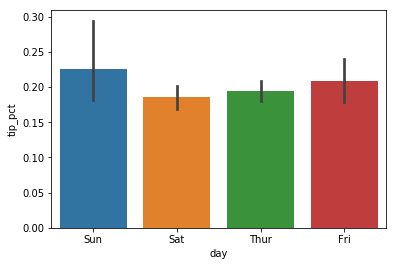

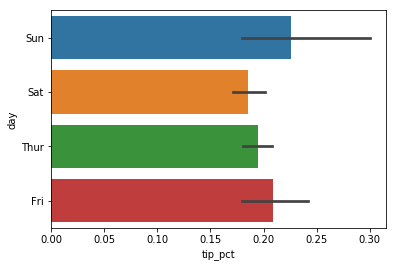

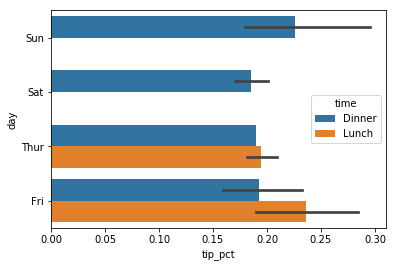

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


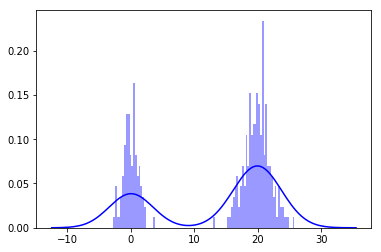

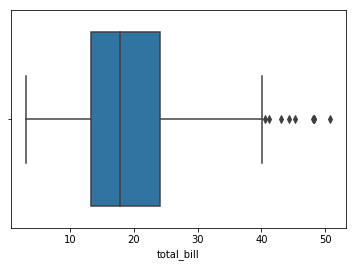

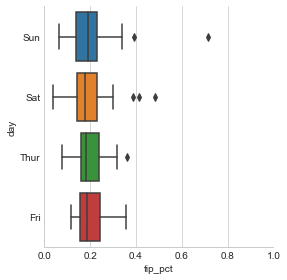

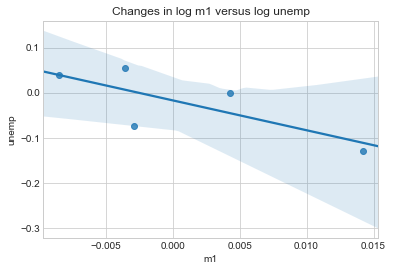

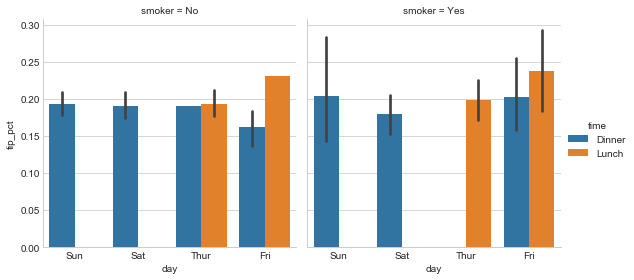

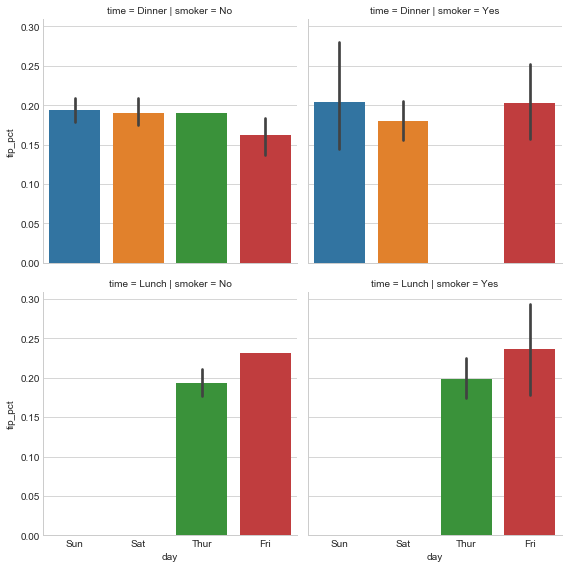

In [127]:
# seaborn graph
import seaborn as sns
import matplotlib.pyplot as plt

tips = pd.read_csv('/Users/shiwenwang/Documents/Python/Data/tips.csv')
tips.head()

# crosstab is good to do frequency calculation, row is categorical variable and column is categorical variable too
party_counts = pd.crosstab(tips['day'],tips['size'])
a = party_counts.sum(0)
print(a)

# sum(1) return each row's sum and axis = 0 to do row divide 
party_counts.div(party_counts.sum(1),axis=0) # axis=0 is to do row divide,cross each column by row 

# add new column
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

# groupby split the data into different groups depending on a variable of your choice. 
print(tips.groupby('day').groups.keys())

# groupby: pick up the first entry for each day 
print(tips.groupby('day').first())

# groupby: calculate mean tip_pct group by day 
print(tips.groupby('day')['tip_pct'].mean())

# groupby: only keep time == 'Dinner', groupby day and calculate mean total_bill
print(tips[tips['time'] =='Dinner'].groupby('day')['tip_pct'].mean())

# groupby: more than one variable
# this is all series so far
print(tips.groupby(['day','time'])['size'].count())
print(type(tips.groupby(['day','time'])['size'].count()))

# combime groupby and agg
# above all create series, use as_index = False to create data frame
print(tips.groupby(['sex','smoker'],as_index=False).agg({'tip_pct':'mean'}))

# assign more than two columns to agg
print(tips.groupby(['sex','size'],as_index=False).agg({'tip_pct':'mean',
                                  'tip':'sum'}))

# simple plot


# bar plot: representation of categorical variable distribution
# the height of the bar plot shows the mean and 95% of confidence interval
sns.barplot(x=tips['day'], y=tips['tip_pct'])
plt.show()
sns.barplot(x='tip_pct', y='day', data=tips)
plt.show()

# seaborn.barplot() has a hue option that enables use to split by an additional 
# categorical value
sns.barplot(x='tip_pct',y='day',hue='time',data=tips)
plt.show()

# histogram: a accurate representation of distribution of continous variable 
comp1 = np.random.normal(0,1,100)
comp1
comp2 = np.random.normal(20,2,200)
comp2
values = pd.Series(np.concatenate([comp1,comp2]))
sns.distplot(values,bins=100,color='b')
plt.show()

data = pd.read_csv('/Users/shiwenwang/Documents/Python/Data/macrodata.csv')
data.head()
data = data[['cpi', 'm1', 'tbilrate', 'unemp']]
transdata = np.log(data).diff().dropna()[:5]

# box plot 
sns.boxplot(tips['total_bill'])
plt.show()

# use factorplot to show boxplot
sns.set_style('whitegrid')
sns.factorplot(x='tip_pct',y='day',kind='box',
              data=tips)
plt.xlim(0,1.0) # set x axis range
# plt.ylim(begin,end) # set y axis range
plt.show()

# scatter plot
# regplot makes a scatter plot and fit a linear regression line
# make plot size bigger by using: plt.figure(figsize=(15,10)).Must add before creating the graph
plt.figure(figsize=(15,10))
# plt.title('Count by Year&Month')
# plt.xlabel('Transaction Year&Month')
# plt.ylabel('Counts')
sns.regplot('m1','unemp',data=transdata)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

# upgraded barplot with additional grouping dimensions(col=variable)
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])
plt.show()


# upgraded barplot with additional grouping dimensions(col=variable, row=variable)
sns.factorplot(x='day',y='tip_pct',row='time',col='smoker',
               data=tips[tips.tip_pct < 1],
              kind='bar')
plt.show()

  key1 key2     data1     data2
2    a  one  0.266994 -1.021071
3    a  two -1.577570  0.692601
4    b  one -0.417416  0.833353
5    b  two  0.194288  0.050157
6    a  one -1.082411 -0.508039
  key1     data1
2    a  0.266994
3    a -1.577570
4    b -0.417416
5    b  0.194288
6    a -1.082411
  key1 key2     data1     data2
4    b  one -0.417416  0.833353
5    b  two  0.194288  0.050157
  key1 key2     data1     data2
4    b  one -0.417416  0.833353
5    b  two  0.194288  0.050157
key1      object
key2      object
data1    float64
data2    float64
dtype: object


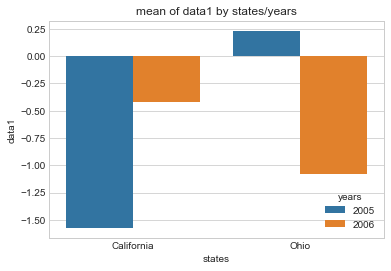

a
  key1 key2     data1     data2      states  years
2    a  one  0.266994 -1.021071        Ohio   2005
3    a  two -1.577570  0.692601  California   2005
6    a  one -1.082411 -0.508039        Ohio   2006
b
  key1 key2     data1     data2      states  years
4    b  one -0.417416  0.833353  California   2006
5    b  two  0.194288  0.050157        Ohio   2005
('a', 'one')
  key1 key2     data1     data2 states  years
2    a  one  0.266994 -1.021071   Ohio   2005
6    a  one -1.082411 -0.508039   Ohio   2006
('a', 'two')
  key1 key2    data1     data2      states  years
3    a  two -1.57757  0.692601  California   2005
('b', 'one')
  key1 key2     data1     data2      states  years
4    b  one -0.417416  0.833353  California   2006
('b', 'two')
  key1 key2     data1     data2 states  years
5    b  two  0.194288  0.050157   Ohio   2005
int64
   years
2   2005
3   2005
4   2006
5   2005
6   2006
float64
      data1     data2
2  0.266994 -1.021071
3 -1.577570  0.692601
4 -0.417416  0.833353

data1                 data2          
                sum count       std  size       max
key1 key2                                          
a    one  -0.815417     2  0.954173     2 -0.508039
     two  -1.577570     1       NaN     1  0.692601
b    one  -0.417416     1       NaN     1  0.833353
     two   0.194288     1       NaN     1  0.050157

In [182]:
# groupby 
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)},
                   index = [2,3,4,5,6])
print(df)

# select column key1, data1
print(df[['key1','data1']])

# select row: 2 to 4
print(df[2:4])
# or
print(df.iloc[[2,3],:])

# to know all columns's data type
print(df.dtypes)

years = np.array([2005, 2005, 2006, 2005, 2006])
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
df['states'] = states
df['years'] = years
df.head()



transdata = df.groupby(['states','years'],as_index=False)['data1'].mean()
sns.barplot(x='states',y='data1',data=transdata, hue='years')
plt.title('mean of data1 by states/years')
plt.show()

# iterate over groups
# the groupby objects generates a sequence of 2-tuples containing the group
# name along with chunk of data
for name, group in df.groupby('key1'):
    print(name)
    print(group)
    
# in case of multipley keys, the first element in the tuple will be a tuple of key values:
for (k1,k2), group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)
    
#group by data's dtype
#axis=0 by row, axis=1 by column
grouped = df.groupby(df.dtypes,axis=1)
grouped

for name,group in grouped:
    print(name)
    print(group)

# calcuate two variable's statistics
df.groupby(['key1','key2'])['data1','data2'].mean()

# if not both are mean
df.groupby(['key1','key2']).agg({'data1':'sum',
                                'data2':'size'}) # here size = count

# calculate more than one statistics for one variable
df.groupby(['key1','key2']).agg({'data1':['sum','count','std'],
                                'data2':['size','max']}) 

In [167]:
# group by function 
people = pd.DataFrame(np.random.randn(5, 5),
                      columns=['a', 'b', 'c', 'd', 'e'],
                      index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people['name'] = ['Nancy,Zhu','Gigi,Wu','Steve,Chen','Yan,Bai','Yun,Wu']

# use split to split first and last name 
people['FirstName']= people['name'].str.split(',').str.get(0)
people['LastName']= people['name'].str.split(',').str.get(1)
print(people)

for name,group in people.groupby(len):
    print(name)
    print(group)
    
    
people.groupby(len).sum() # len is index's length





               a         b         c         d         e        name  \
Joe     1.765813 -0.641109 -0.269710  0.170529 -1.343797   Nancy,Zhu   
Steve  -0.133868  0.639667  1.592994  1.222284  1.175016     Gigi,Wu   
Wes    -1.188749 -0.916364  0.397177 -0.221380 -0.853735  Steve,Chen   
Jim     0.123723 -1.482203  0.284544 -0.997577 -0.574261     Yan,Bai   
Travis  0.265549  0.343327 -0.310103 -1.583240  0.016376      Yun,Wu   

       FirstName LastName  
Joe        Nancy      Zhu  
Steve       Gigi       Wu  
Wes        Steve     Chen  
Jim          Yan      Bai  
Travis       Yun       Wu  
3
            a         b         c         d         e        name FirstName  \
Joe  1.765813 -0.641109 -0.269710  0.170529 -1.343797   Nancy,Zhu     Nancy   
Wes -1.188749 -0.916364  0.397177 -0.221380 -0.853735  Steve,Chen     Steve   
Jim  0.123723 -1.482203  0.284544 -0.997577 -0.574261     Yan,Bai       Yan   

    LastName  
Joe      Zhu  
Wes     Chen  
Jim      Bai  
5
              a   

,a,b,c,d,e
3,0.700788,-3.039676,0.412012,-1.048428,-2.771793
5,-0.133868,0.639667,1.592994,1.222284,1.175016
6,0.265549,0.343327,-0.310103,-1.583240,0.016376


In [218]:
# select first highest records group by sex and total_bill

tips = pd.read_csv('/Users/shiwenwang/Documents/Python/Data/tips.csv')
tips.head()

tips.head()

# method 1:
# 1 step: sort_values 
# 2 step: group by variables
# 3 step: pick up first few records when needed. Apply first() only give the first records, 
# head(n) to give the first n records based on each group
grouped = tips.sort_values(['sex','total_bill'],
                 ascending=[True,False]).groupby('sex').head(2)

# method 2: by using apply function 
def fun(df,n=5,column='tip'):
    return df.sort_values(column,ascending=False)[:n]

fun(tips,5,'tip')
print(tips.groupby('sex').apply(fun))

# if you pass a function to apply that takes other arguments or keywords, 
# you can pass these arguments after the function 
print(tips.groupby('sex').apply(fun,n=10,column='total_bill'))
data1 = tips.groupby('sex').apply(fun,n=10,column='total_bill')

# suppress the group_keys by calling group_keys=False, then sex Female and male won't show up
print(tips.groupby(['sex'],group_keys=False).apply(fun))

# reset_index: before reset_index must drop sex, since index also contains sex 
data2 = data1.drop(columns=['sex']).reset_index()
print(data2)

            total_bill    tip     sex smoker   day    time  size
sex                                                             
Female 214       28.17   6.50  Female    Yes   Sat  Dinner     3
       52        34.81   5.20  Female     No   Sun  Dinner     4
       85        34.83   5.17  Female     No  Thur   Lunch     4
       155       29.85   5.14  Female     No   Sun  Dinner     5
       11        35.26   5.00  Female     No   Sun  Dinner     4
Male   170       50.81  10.00    Male    Yes   Sat  Dinner     3
       212       48.33   9.00    Male     No   Sat  Dinner     4
       23        39.42   7.58    Male     No   Sat  Dinner     4
       59        48.27   6.73    Male     No   Sat  Dinner     4
       141       34.30   6.70    Male     No  Thur   Lunch     6
            total_bill    tip     sex smoker   day    time  size
sex                                                             
Female 102       44.30   2.50  Female    Yes   Sat  Dinner     3
       197       43.11   

In [209]:
# stack and unstack
tips['tip_pct'] = tips['tip']/tips['total_bill']
result = tips.groupby('smoker')['tip_pct'].describe()
result
result.stack()
result.unstack('smoker')

# pivot table: DataFrame.pivot_table(index=variable,columns=variable,values=variable,aggfunc=functions)
# calculate mean of total_bill by sex, column is time
table_sex = tips.pivot_table(index='sex',columns='time',
                             values='total_bill',aggfunc=np.sum)
table_sex['row_sum'] = table_sex.sum(1)
table_sex['Dinner_pct'] = table_sex['Dinner']/table_sex['row_sum']
table_sex['Lunch_pct'] = table_sex['Lunch']/table_sex['row_sum']
print(table_sex)

# method2 
table_sex_time = tips.pivot_table(index='sex',columns='time',
                                    values='total_bill',aggfunc=np.sum)
table_sex_time.div(table_sex_time.sum(1),axis=0)

time     Dinner   Lunch  row_sum  Dinner_pct  Lunch_pct
sex                                                    
Female   999.08  571.87  1570.95    0.635972   0.364028
Male    2661.22  595.60  3256.82    0.817122   0.182878


time,Dinner,Lunch
sex,,
Female,0.635972,0.364028
Male,0.817122,0.182878


In [229]:
# cut and then calculate min, max and mean based on cut categories
# cut to create equal length bucket
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})

frame['category'] = pd.cut(frame['data1'],4)
frame.head()

frame2 = frame.groupby('category').agg({'data2':['min','max','mean']})
frame2.index
frame2.columns
print(frame['category'].value_counts())

# qcut: labels=False give 1 to 10
# qcut creaates equal size observations of bucket
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})
frame['category'] = pd.qcut(frame['data1'],10,labels=False)
frame['category'].value_counts()


(-0.0653, 1.362]     450
(-1.493, -0.0653]    389
(1.362, 2.789]        92
(-2.925, -1.493]      69
Name: category, dtype: int64


9    100
8    100
7    100
6    100
5    100
4    100
3    100
2    100
1    100
0    100
Name: category, dtype: int64

In [283]:
# fillna by groups
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']

data = pd.Series(np.random.randn(8),index=states)
data[['Nevada','Ohio']] = np.nan
data = pd.DataFrame(data,columns=['Number'])
data 
data['Region'] = ['easter']*4 + ['west']*4
data


#fillna by overall mean
data.fillna(data['Number'].mean())

#fillna by groups mean
Ser = data.groupby('Region')['Number'].mean()
print(Ser)
data_group = pd.DataFrame(Ser).reset_index()
print(data_group)
data_group = pd.merge(data,data_group,left_on='Region',right_on='Region',how='left')

# if Number_x is missing use Number_y to replace, must add inplace=True
data_group['Number_x'].fillna(data_group['Number_y'],inplace=True)
data_group 

# method 2: use fillna with group togehter 
# step1 : groupby key, then give the column need to fillna
# step2 : apply fillna function 

states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']

data = pd.Series(np.random.randn(8),index=states)
data[['Nevada','Ohio']] = np.nan
data = pd.DataFrame(data,columns=['Number'])
data 
data['Region'] = ['easter']*4 + ['west']*4
data

data['Number'] = data.groupby(['Region'])['Number'].apply(lambda x: x.fillna(x.mean()))
print(data)

# example: calculate group mean by weights
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a','b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})
df.head()

# groupby object returns few sub datasets based on groups
for name,group in df.groupby('category'):
    print(name)
    print(group)
    
df.groupby('category').apply(lambda x: np.average(x['data'],weights=x['weights']))

Region
easter   -0.636906
west     -0.635317
Name: Number, dtype: float64
   Region    Number
0  easter -0.636906
1    west -0.635317
              Number  Region
Ohio       -0.733146  easter
New York   -1.397765  easter
Vermont    -0.473582  easter
Florida    -0.328091  easter
Oregon      0.230421    west
Nevada     -0.645823    west
California -0.883461    west
Idaho      -1.284428    west
a
  category      data   weights
0        a  0.742231  0.425315
1        a -1.031783  0.471443
2        a  0.679021  0.651011
3        a  0.813420  0.735206
b
  category      data   weights
4        b -0.352898  0.272055
5        b -0.798747  0.924329
6        b -1.931926  0.924700
7        b  1.610766  0.796989
category


category
a    0.380791
b   -0.458179
dtype: float64

In [333]:
# read_csv

# parse_dates=True, is to parse dates
# sep: to decide the delimiter, default is comma in csv,'\s+' means whitespace
# header: to decide whether the data frame has header or not, if don't want header,set header=None
# names = ['var1','var2',...] to list column names when header=None
# index_col is assign which column as index, 0 means to assign the first column as index, 1 means assign the second column to index
# skiprows: to skip rows when read in csv file, example skiprows=[0,3,5,10]
# skipfooter: number of lines at bottom of file to skip
# nrows: number of rows to read in 
# na_values: additional strings to recognize as NA, example na_values= ['NULL','NAN']
# parse_dates = True to parse dates
# low_memory = False to ensure no mixed types of data
close_px = pd.read_csv('/Users/shiwenwang/Documents/Python/Data/stock_px_2.csv',
                  parse_dates=True,
                  index_col=0)
close_px.head()

# info() to know dataframe's dtypes
close_px.info()

# pct_change(): is to calculate the percentage changes of the next one on the first one. The first records return Na
close_px.pct_change()

# dropna() is to drop na record
rets = close_px.pct_change().dropna()
rets.head()

# get year
# calculate x.corrwith(x['variable'])
spx_corr = lambda x: x.corrwith(x['SPX'])
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
print(by_year)
print(by_year.apply(spx_corr))

## corr calculate one column and another column's correlation 
by_year = rets.groupby(lambda x:x.year)
by_year.apply(lambda g:g['AAPL'].corr(g['MSFT']))




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB
          AAPL      MSFT       XOM  SPX
2003  0.541124  0.745174  0.661265  1.0
2004  0.374283  0.588531  0.557742  1.0
2005  0.467540  0.562374  0.631010  1.0
2006  0.428267  0.406126  0.518514  1.0
2007  0.508118  0.658770  0.786264  1.0
2008  0.681434  0.804626  0.828303  1.0
2009  0.707103  0.654902  0.797921  1.0
2010  0.710105  0.730118  0.839057  1.0
2011  0.691931  0.800996  0.859975  1.0


2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

In [349]:
## apply: find more examples to practice??

# pivot_table
tips['tip_pct'] = tips['tip']/tips['total_bill']
print(tips.head())

# pivot_table's default is to calculate np.mean 
tips.pivot_table(index=['day','smoker'])

# here, we are only interested in size, aggregate by row:'time', 'day'
# and by columns 'smoker'
# size is the value here
tips.pivot_table([ 'size'],index=['time', 'day'],
                columns='smoker')

# give margins=True, to add the row all(mean), and column all
# size here is the values
print(tips.pivot_table(['size'],index=['time', 'day'],
                columns='smoker',margins=True))

# or 
print(tips.pivot_table(values='size',
                       index=['time', 'day'],
                       columns='smoker',
                       margins=True))

# add both aggfunc and fill_value
# use [] around tip_pct to show the tip_pct above the table
print(tips.pivot_table(['tip_pct'], 
                       index=['time', 'size', 'smoker'],
                       columns='day', 
                       aggfunc='mean', 
                       fill_value=0))

# cross tabulation 
# pd.crosstab(row_variable, column_variable, margins=True)

   total_bill   tip     sex smoker  day    time  size   tip_pct
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808
                 size                    
smoker             No       Yes       All
time   day                               
Dinner Fri   2.000000  2.222222  2.166667
       Sat   2.555556  2.476190  2.517241
       Sun   2.929825  2.578947  2.842105
       Thur  2.000000       NaN  2.000000
Lunch  Fri   3.000000  1.833333  2.000000
       Thur  2.500000  2.352941  2.459016
All          2.668874  2.408602  2.569672
smoker             No       Yes       All
time   day                               
Dinner Fri   2.000000  2.222222  2.166667
       Sat   2.555556  2.476190  2.517241
       Sun   2.929825  2.578

In [355]:
# time series data
from datetime import datetime
now = datetime.now()
print(now)

# extract year, month and day 
now.year, now.month, now.day

# datetime stores both the date and time down to the microsecond.
# timedelta represents the temporal difference between two datetime objects:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)
delta
print(delta.days)
print(delta.seconds)

# timedelta represents days 
from datetime import timedelta
start = datetime(2011,1,7)
print(start + timedelta(12)) # add 12 days
print(start - 2*timedelta(12))


2018-07-02 14:33:39.933230
926
56700
2011-01-19 00:00:00
2010-12-14 00:00:00


In [501]:
# convert between string and datetime
# str or strftime represent strings
# change from date to str
stamp = datetime(2011,1,3)
print(str(stamp))
print(stamp.strftime('%Y-%m-%d'))

# change from str to date to use datetime.strptime
value = '2018-07-01'
datetime.strptime(value,'%Y-%m-%d')

datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

# when you know the date format, it is goood to use datetime.strptime to parse dates.
# when you dont know it, you can use dateutil.parse parse date
from dateutil.parser import parse
print(parse('2011-01-03'))
print(parse('Jan 31, 1997 10:45 PM'))

# pd.to_datetime in pandas change string to dates
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

# it also handles values that should be considered missing 
datestrs = datestrs + [None]
datestrs
idx = pd.to_datetime(datestrs)
idx[2]
idx.isnull()




2011-01-03 00:00:00
2011-01-03
2011-01-03 00:00:00
1997-01-31 22:45:00


0    102
1    105
2    107
3    108
4    110
5    112
Name: dates, dtype: int64

In [507]:
# a basic kind of time series object in pandas is Series indexed by timestamps
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts = pd.DataFrame(ts).reset_index()
ts.columns = ['dates','series']
ts['dates'].dt.month*100 + ts['dates'].dt.day
print(ts.head())


# indexing, selection and subsetting 
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)

stamp = ts.index[2]
print(stamp)

# as a convenience, you can also pass a string that is interpretable as a date:
print(ts['2011-01-07'])
print(ts['Jan 7, 2011'])





       dates    series
0 2011-01-02 -0.235469
1 2011-01-05  1.150666
2 2011-01-07 -1.137605
3 2011-01-08  0.073803
4 2011-01-10  0.448233
2011-01-07 00:00:00
-1.332933519540052
-1.332933519540052


In [511]:
# use pd.date_range to generate more dates 
long_dates = pd.Series(np.random.normal(10,2,1000),
                      index = pd.date_range('1/1/2015',periods=1000))
print(long_dates[:6])

# select all records with index as 2016
print(long_dates['2016'][:6])

# select all records with index as 2016 May
print(long_dates['2016-05'][:8])

# select records with index '2016-05-08'
print(long_dates['2016-05-08'])

# slice with timestamps ranges
long_dates['2015-09-01':'2015-09-10']

# truncate with after dates: truncate(delete) dates after 2017-5-6
long_dates.truncate(after='2017-05-06')

# create data frame
dates = pd.date_range('1/1/2000',periods=100,freq='W-Wed')
dates


2015-01-01    12.179695
2015-01-02     6.888263
2015-01-03     6.056776
2015-01-04     8.521389
2015-01-05    11.201523
2015-01-06     9.141734
Freq: D, dtype: float64
2016-01-01    11.524847
2016-01-02    11.122820
2016-01-03     5.476557
2016-01-04    11.554551
2016-01-05    10.497910
2016-01-06    10.842089
Freq: D, dtype: float64
2016-05-01     9.427081
2016-05-02    11.547277
2016-05-03     6.880744
2016-05-04     6.224826
2016-05-05    10.160258
2016-05-06    10.918813
2016-05-07    14.977300
2016-05-08     8.780081
Freq: D, dtype: float64
8.78008116708314


DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08', '2000-03-15', '2000-03-22',
               '2000-03-29', '2000-04-05', '2000-04-12', '2000-04-19',
               '2000-04-26', '2000-05-03', '2000-05-10', '2000-05-17',
               '2000-05-24', '2000-05-31', '2000-06-07', '2000-06-14',
               '2000-06-21', '2000-06-28', '2000-07-05', '2000-07-12',
               '2000-07-19', '2000-07-26', '2000-08-02', '2000-08-09',
               '2000-08-16', '2000-08-23', '2000-08-30', '2000-09-06',
               '2000-09-13', '2000-09-20', '2000-09-27', '2000-10-04',
               '2000-10-11', '2000-10-18', '2000-10-25', '2000-11-01',
               '2000-11-08', '2000-11-15', '2000-11-22', '2000-11-29',
               '2000-12-06', '2000-12-13', '2000-12-20', '2000-12-27',
               '2001-01-03', '2001-01-10', '2001-01-17', '2001-01-24',
      

In [512]:

long_df = pd.DataFrame(np.random.randn(100,4),
                      index=dates,
                      columns=['Colorado', 'Texas','New York', 'Ohio'])
long_df.head()

# dates function, default freq='D'. 
# date_range creates datetimeindex. Extract year, month, day from datetimeIndex, directly add .year afterward
rng = pd.date_range('1/1/2015',periods=50,freq='5D')
rng.year
rng.day
rng.month
rng

# timestamp: pd.timestamp
# pd.to_datetime to create datetimeindex
dates = [pd.Timestamp('2012-05-01'), pd.Timestamp('2012-05-02'), pd.Timestamp('2012-05-03')]
print(pd.to_datetime(dates).year)

# create date_range as index of series
rng = pd.date_range('1/1/2017',periods=10,freq='H')
se = pd.Series(np.random.randn(len(rng)),index=rng)
print(se)

# change to 45 Min and forward fill
print(se.asfreq('45Min',method='pad'))

# resample to daily frequency. When index is datetimeindex
se.resample('3H').mean()

pd.Timestamp('2015-03-24')
pd.datetime(2015,3,24)

# convert series by using pd.to_datetime, returns series
se2 = pd.to_datetime(pd.Series(['Jul 31, 2009', '2010-01-10', None]))
# since it is a series, need to add dt before year
se2.dt.year

# convert list by using pd.to_datetime, return datetimeindex
# format control the format present datetime 
dtindex = pd.to_datetime(['2005/11/23', '2010.12.31'],
                         format='%Y-%m-%d')
dtindex

# assemble data together 
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5],
                   'hour': [2, 3]})
pd.to_datetime(df)

# only assign few columns to to_datetime
pd.to_datetime(df[['year','month','day']])

Int64Index([2012, 2012, 2012], dtype='int64')
2017-01-01 00:00:00    1.093083
2017-01-01 01:00:00    0.838149
2017-01-01 02:00:00   -0.591544
2017-01-01 03:00:00   -0.762827
2017-01-01 04:00:00   -0.872473
2017-01-01 05:00:00   -0.356701
2017-01-01 06:00:00    0.305738
2017-01-01 07:00:00   -0.902786
2017-01-01 08:00:00   -2.738692
2017-01-01 09:00:00   -0.484127
Freq: H, dtype: float64
2017-01-01 00:00:00    1.093083
2017-01-01 00:45:00    1.093083
2017-01-01 01:30:00    0.838149
2017-01-01 02:15:00   -0.591544
2017-01-01 03:00:00   -0.762827
2017-01-01 03:45:00   -0.762827
2017-01-01 04:30:00   -0.872473
2017-01-01 05:15:00   -0.356701
2017-01-01 06:00:00    0.305738
2017-01-01 06:45:00    0.305738
2017-01-01 07:30:00   -0.902786
2017-01-01 08:15:00   -2.738692
2017-01-01 09:00:00   -0.484127
Freq: 45T, dtype: float64


0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [500]:
# duplicates timestamp
dup_ts = pd.Series(np.random.randn(5),index = ['1/1/2000', '1/2/2000', '1/2/2000','1/2/2000', '1/3/2000'])
print(dup_ts.index)

# change from string to datetime
dup_ts.index = pd.to_datetime(dup_ts.index)
print(dup_ts)

# is_unique
dup_ts.index.is_unique

Index(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'], dtype='object')
2000-01-01    1.155198
2000-01-02   -0.663842
2000-01-02    0.451078
2000-01-02   -1.059817
2000-01-03   -0.266112
dtype: float64


False

In [393]:
# aggregate data by index by passing level=0
print(dup_ts.groupby(level=0).count())

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [397]:
# pandas.date_range is responsible for generating a datetimeindex with an indicated length according to a particular 
# frequency:
index = pd.date_range('1/2/2014','1/30/2014')
index

# by default, date_range generates daily timestamps
index2 = pd.date_range(start='1/2/2014',periods=30)
index2

# BM means business end of month
index3 = pd.date_range('2000-01-01', '2000-12-01', freq='BM')
index3

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [399]:
# frequency as 4h
from pandas.tseries.offsets import Hour, Minute
pd.date_range('2000-01-01','2000-01-03',freq='4h')

Hour(2)+Minute(30)

<150 * Minutes>

In [403]:
# shift(leading and lagging) Data means backward and forward through time
# M means month end
ts = pd.Series(np.random.randn(4),
              index = pd.date_range('1/1/2000',periods=4,freq='M'))
print(ts)

# shift(2) means forward 2 days
print(ts.shift(2))

# shift(-2) means backward 2 days
print(ts.shift(-2))

# because naive shifts leave the data unmodified, some data is discarded. Thus, if the 
# frequency is known, it can be passed to shift to advance the timestamps instead of simply the data.
print(ts.shift(2,freq='M')) # add freq='M' to shift the index as well

2000-01-31   -0.496708
2000-02-29   -0.998130
2000-03-31   -2.159035
2000-04-30    1.710398
Freq: M, dtype: float64
2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.496708
2000-04-30   -0.998130
Freq: M, dtype: float64
2000-01-31   -2.159035
2000-02-29    1.710398
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64


2000-03-31   -0.496708
2000-04-30   -0.998130
2000-05-31   -2.159035
2000-06-30    1.710398
Freq: M, dtype: float64

In [409]:
# Day and monthend 
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011,11,17)
print(now)

print(now + MonthEnd())

print(now+ Day()*3)

# pd.unique
values = pd.Series(['apple', 'orange', 'apple','apple'] * 2)
pd.unique(values)

2011-11-17 00:00:00
2011-11-30 00:00:00
2011-11-20 00:00:00


array(['apple', 'orange'], dtype=object)

In [513]:
# np.random.randint returns random integers from low(inclusive) to high(exclusive)
print(np.random.randint(0,19,6))

# np.random.uniform returns random uniform distributed over [low,high). Any value between could be 
# equally likely to be extracted by uniform. Data is float. 
np.random.uniform(0,10,10)

[ 9 14  9  5 11  4]


array([0.29197085, 3.58793702, 4.68199409, 2.30532301, 1.03690436,
       9.85316402, 3.71667322, 9.77186014, 5.07089284, 4.92828374])

In [518]:
# apply function to columns 
data = pd.DataFrame({'Fruits':['Apple','Apple','Pear','Pear','Orange'],
                    'Price':['$12.10','$100.23','$1,012.23','$40,34','$12.34']})
data
data.info()

# apply function to change price to numbers
# float is to change string to float number
# str.replace is applied to Series. In dataframe, could directly use replace. 
def get_number(var):
   return(float(var.replace('$',"").replace(",","")))
   
# apply function to data frame column, apply function to each element of the column
data['Price_number'] = data['Price'].apply(get_number)
data 

# apply to each row 
rectangles = [
    { 'height': 40, 'width': 10 },
    { 'height': 20, 'width': 9 },
    { 'height': 3.4, 'width': 4 }
]

rec_df = pd.DataFrame(rectangles)
print(rec_df)
rec_df['category'] = ['A','A','B']
rec_df['price'] = ['$12,43','$23.56','$56.84']

print(rec_df.head())

def setfil(var):
    if var > 21:
        return(1)
    else:
        return(0)
rec_df['height_ind'] = rec_df['height'].apply(setfil)
print(rec_df)

# apply function to data frame
def multi_fun(row):
    return(row['height']*row['width'])

rec_df['mul_number'] = rec_df.apply(multi_fun,axis=1) # axis is to operate on rows 
print(rec_df)

# apply lambda function to data frame column 
print(rec_df['height'].apply(lambda x: 1 if x <20 else 0))

# if it is only one element, directly use replace. 
# If it is series(data frame column), need to use str.replace
rec_df.category = rec_df.category.str.lower()
rec_df.price = rec_df.price.str.replace('$','').str.replace(',','').astype('float')
print(rec_df)

# len(dataframe) returns number of rows
print(len(rec_df))
print(len(rec_df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
Fruits    5 non-null object
Price     5 non-null object
dtypes: object(2)
memory usage: 160.0+ bytes
   height  width
0    40.0     10
1    20.0      9
2     3.4      4
   height  width category   price
0    40.0     10        A  $12,43
1    20.0      9        A  $23.56
2     3.4      4        B  $56.84
   height  width category   price  height_ind
0    40.0     10        A  $12,43           1
1    20.0      9        A  $23.56           0
2     3.4      4        B  $56.84           0
   height  width category   price  height_ind  mul_number
0    40.0     10        A  $12,43           1       400.0
1    20.0      9        A  $23.56           0       180.0
2     3.4      4        B  $56.84           0        13.6
0    0
1    0
2    1
Name: height, dtype: int64
   height  width category    price  height_ind  mul_number
0    40.0     10        a  1243.00           1       400.0
1    20.0    

In [520]:
# union of two sorted list
a = [1,2,3]
b = [3,4,5]

# set can only keep unique elements
ab = list(set(a+b))
ab.sort()
ab

[1, 2, 3, 4, 5]

In [498]:
# assign to add new column to data frame
# https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html#compare-with-sql-join
import pandas as pd
import numpy as np

# read csv
url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv'
tips = pd.read_csv(url)
tips.head()



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
